# EDA (Exploratory Data Analysis)
- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**

1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

- **Import data and data description**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/EDA-1/data_clean.csv',index_col=0)
df

Ozone  Solar.R  Wind Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     5    1  2010    67       S
2     36.0    118.0   8.0     5    2  2010    72       C
3     12.0    149.0  12.6     5    3  2010    74      PS
4     18.0    313.0  11.5     5    4  2010    62       S
5      NaN      NaN  14.3     5    5  2010    56       S
..     ...      ...   ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     5    1  2010    67       C
155   30.0    193.0   6.9     9   26  2010    70      PS
156    NaN    145.0  13.2     9   27  2010    77       S
157   14.0    191.0  14.3     9   28  2010    75       S
158   18.0    131.0   8.0     9   29  2010    76       C

[158 rows x 8 columns]

In [3]:
df.describe()  # summary of data

Ozone     Solar.R        Wind         Day    Year        Temp
count  120.000000  151.000000  158.000000  158.000000   158.0  158.000000
mean    41.583333  185.403974    9.957595   16.006329  2010.0   77.727848
std     32.620709   88.723103    3.511261    8.997166     0.0    9.377877
min      1.000000    7.000000    1.700000    1.000000  2010.0   56.000000
25%     18.000000  119.000000    7.400000    8.000000  2010.0   72.000000
50%     30.500000  197.000000    9.700000   16.000000  2010.0   78.500000
75%     61.500000  257.000000   11.875000   24.000000  2010.0   84.000000
max    168.000000  334.000000   20.700000   31.000000  2010.0   97.000000

In [4]:
df.describe(include=object)  #summary of strings(object)

Month Weather
count    158     155
unique     6       3
top        9       S
freq      34      59

In [5]:
df.head(2)

Ozone  Solar.R  Wind Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     5    1  2010    67       S
2   36.0    118.0   8.0     5    2  2010    72       C

In [6]:
df.dtypes #data types of each column

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [7]:
df.info()  #data types of each column

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.1+ KB


- As we can see that,
- 'Month' column has all the numeric data still python has shown us that it is object.
- We will have to find out the reason and change the data type of the column.

## Data type conversion

In [8]:
df['Month']  #extract column

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

In [9]:
df['Month'].unique() #unique values in particular column

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [10]:
df['Month'].value_counts()  # unique values of particular column with their frequency

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64

In [11]:
df['Month'].replace('May','5')  #replace may by 5 and this changes temporary. Here by default inplace = False

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: object

In [12]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [13]:
df['Month'].replace('May','5',inplace=True) #replace may by 5 and this changes permanant by using inplace=True

In [14]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [15]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [16]:
df['Month'].astype(int) #changes data type into integer

1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int32

In [17]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [18]:
df['Month'] = df['Month'].astype(int)  #permanant changes

In [19]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [20]:
df['Location']='Pune'  #Add new column
df

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather Location
1     41.0    190.0   7.4      5    1  2010    67       S     Pune
2     36.0    118.0   8.0      5    2  2010    72       C     Pune
3     12.0    149.0  12.6      5    3  2010    74      PS     Pune
4     18.0    313.0  11.5      5    4  2010    62       S     Pune
5      NaN      NaN  14.3      5    5  2010    56       S     Pune
..     ...      ...   ...    ...  ...   ...   ...     ...      ...
154   41.0    190.0   7.4      5    1  2010    67       C     Pune
155   30.0    193.0   6.9      9   26  2010    70      PS     Pune
156    NaN    145.0  13.2      9   27  2010    77       S     Pune
157   14.0    191.0  14.3      9   28  2010    75       S     Pune
158   18.0    131.0   8.0      9   29  2010    76       C     Pune

[158 rows x 9 columns]

In [21]:
df.drop(columns=['Location'],inplace = True)  # delete a column

 ## Duplicates

In [22]:
df

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4      5    1  2010    67       S
2     36.0    118.0   8.0      5    2  2010    72       C
3     12.0    149.0  12.6      5    3  2010    74      PS
4     18.0    313.0  11.5      5    4  2010    62       S
5      NaN      NaN  14.3      5    5  2010    56       S
..     ...      ...   ...    ...  ...   ...   ...     ...
154   41.0    190.0   7.4      5    1  2010    67       C
155   30.0    193.0   6.9      9   26  2010    70      PS
156    NaN    145.0  13.2      9   27  2010    77       S
157   14.0    191.0  14.3      9   28  2010    75       S
158   18.0    131.0   8.0      9   29  2010    76       C

[158 rows x 8 columns]

In [23]:
df.duplicated() # if at any position duplicated value is present then it gives true

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [24]:
df.duplicated().sum()  #gives count of duplicated values

1

In [25]:
# Print the duplicated values
df[df.duplicated()]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3      9   28  2010    75       S

In [26]:
df[(df['Ozone'] == 14.0) & (df['Solar.R'] ==191.0)]

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3      9   28  2010    75       S
157   14.0    191.0  14.3      9   28  2010    75       S

In [27]:
df.duplicated(keep='last') # consider last as original and another is duplicate

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157    False
158    False
Length: 158, dtype: bool

In [28]:
df.duplicated(keep = False) # Both entries considered as duplicates

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [29]:
df.duplicated(keep = 'first') # consider first as original and another is duplicate

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [30]:
df[df.duplicated(keep=False)] # here both entries considered as duplicates

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3      9   28  2010    75       S
157   14.0    191.0  14.3      9   28  2010    75       S

In [31]:
#Drop Duplicated records
df.drop_duplicates(inplace=True)  # permanant delete duplicate values

In [32]:
df.shape  # here we can see 

(157, 8)

In [33]:
df.duplicated().sum() # this shows count of duplicated value

0

## Drop columns
- There is one column which only has single different value.
- We need to get rid of all the uneccesary columns or else it will be very complex data.

In [34]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4      5    1  2010    67       S
2   36.0    118.0   8.0      5    2  2010    72       C
3   12.0    149.0  12.6      5    3  2010    74      PS
4   18.0    313.0  11.5      5    4  2010    62       S
5    NaN      NaN  14.3      5    5  2010    56       S

In [35]:
df.drop(columns=['Year'], inplace=True)  #permanantly year column deleted

In [36]:
df

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1     41.0    190.0   7.4      5    1    67       S
2     36.0    118.0   8.0      5    2    72       C
3     12.0    149.0  12.6      5    3    74      PS
4     18.0    313.0  11.5      5    4    62       S
5      NaN      NaN  14.3      5    5    56       S
..     ...      ...   ...    ...  ...   ...     ...
153   20.0    223.0  11.5      9   30    68       S
154   41.0    190.0   7.4      5    1    67       C
155   30.0    193.0   6.9      9   26    70      PS
156    NaN    145.0  13.2      9   27    77       S
158   18.0    131.0   8.0      9   29    76       C

[157 rows x 7 columns]

In [37]:
df.drop(columns=['Ozone','Wind']) #both column are deleted temporary

Solar.R  Month  Day  Temp Weather
1      190.0      5    1    67       S
2      118.0      5    2    72       C
3      149.0      5    3    74      PS
4      313.0      5    4    62       S
5        NaN      5    5    56       S
..       ...    ...  ...   ...     ...
153    223.0      9   30    68       S
154    190.0      5    1    67       C
155    193.0      9   26    70      PS
156    145.0      9   27    77       S
158    131.0      9   29    76       C

[157 rows x 5 columns]

In [38]:
df

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1     41.0    190.0   7.4      5    1    67       S
2     36.0    118.0   8.0      5    2    72       C
3     12.0    149.0  12.6      5    3    74      PS
4     18.0    313.0  11.5      5    4    62       S
5      NaN      NaN  14.3      5    5    56       S
..     ...      ...   ...    ...  ...   ...     ...
153   20.0    223.0  11.5      9   30    68       S
154   41.0    190.0   7.4      5    1    67       C
155   30.0    193.0   6.9      9   26    70      PS
156    NaN    145.0  13.2      9   27    77       S
158   18.0    131.0   8.0      9   29    76       C

[157 rows x 7 columns]

In [39]:
df.drop(index = [153,1])  #delete rows temporary

Ozone  Solar.R  Wind  Month  Day  Temp Weather
2     36.0    118.0   8.0      5    2    72       C
3     12.0    149.0  12.6      5    3    74      PS
4     18.0    313.0  11.5      5    4    62       S
5      NaN      NaN  14.3      5    5    56       S
6     28.0      NaN  14.9      5    6    66       C
..     ...      ...   ...    ...  ...   ...     ...
152   18.0    131.0   8.0      9   29    76      PS
154   41.0    190.0   7.4      5    1    67       C
155   30.0    193.0   6.9      9   26    70      PS
156    NaN    145.0  13.2      9   27    77       S
158   18.0    131.0   8.0      9   29    76       C

[155 rows x 7 columns]

In [40]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1   41.0    190.0   7.4      5    1    67       S
2   36.0    118.0   8.0      5    2    72       C
3   12.0    149.0  12.6      5    3    74      PS
4   18.0    313.0  11.5      5    4    62       S
5    NaN      NaN  14.3      5    5    56       S

In [41]:
# df.drop(columns=['Location'], inplace=True)

In [42]:
df

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1     41.0    190.0   7.4      5    1    67       S
2     36.0    118.0   8.0      5    2    72       C
3     12.0    149.0  12.6      5    3    74      PS
4     18.0    313.0  11.5      5    4    62       S
5      NaN      NaN  14.3      5    5    56       S
..     ...      ...   ...    ...  ...   ...     ...
153   20.0    223.0  11.5      9   30    68       S
154   41.0    190.0   7.4      5    1    67       C
155   30.0    193.0   6.9      9   26    70      PS
156    NaN    145.0  13.2      9   27    77       S
158   18.0    131.0   8.0      9   29    76       C

[157 rows x 7 columns]

## Rename the columns 

In [43]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1   41.0    190.0   7.4      5    1    67       S
2   36.0    118.0   8.0      5    2    72       C
3   12.0    149.0  12.6      5    3    74      PS
4   18.0    313.0  11.5      5    4    62       S
5    NaN      NaN  14.3      5    5    56       S

In [44]:
df.rename(columns={'Solar.R':'Solar','Temp':'Temperature'},inplace=True)  #rename column. here we use dictionary

In [45]:
df

Ozone  Solar  Wind  Month  Day  Temperature Weather
1     41.0  190.0   7.4      5    1           67       S
2     36.0  118.0   8.0      5    2           72       C
3     12.0  149.0  12.6      5    3           74      PS
4     18.0  313.0  11.5      5    4           62       S
5      NaN    NaN  14.3      5    5           56       S
..     ...    ...   ...    ...  ...          ...     ...
153   20.0  223.0  11.5      9   30           68       S
154   41.0  190.0   7.4      5    1           67       C
155   30.0  193.0   6.9      9   26           70      PS
156    NaN  145.0  13.2      9   27           77       S
158   18.0  131.0   8.0      9   29           76       C

[157 rows x 7 columns]

## Missing value imputation
- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data
    - And many more.

In [46]:
#Checking null values
df


Ozone  Solar  Wind  Month  Day  Temperature Weather
1     41.0  190.0   7.4      5    1           67       S
2     36.0  118.0   8.0      5    2           72       C
3     12.0  149.0  12.6      5    3           74      PS
4     18.0  313.0  11.5      5    4           62       S
5      NaN    NaN  14.3      5    5           56       S
..     ...    ...   ...    ...  ...          ...     ...
153   20.0  223.0  11.5      9   30           68       S
154   41.0  190.0   7.4      5    1           67       C
155   30.0  193.0   6.9      9   26           70      PS
156    NaN  145.0  13.2      9   27           77       S
158   18.0  131.0   8.0      9   29           76       C

[157 rows x 7 columns]

In [47]:
df.isnull() #return a true if value is missing

Ozone  Solar   Wind  Month    Day  Temperature  Weather
1    False  False  False  False  False        False    False
2    False  False  False  False  False        False    False
3    False  False  False  False  False        False    False
4    False  False  False  False  False        False    False
5     True   True  False  False  False        False    False
..     ...    ...    ...    ...    ...          ...      ...
153  False  False  False  False  False        False    False
154  False  False  False  False  False        False    False
155  False  False  False  False  False        False    False
156   True  False  False  False  False        False    False
158  False  False  False  False  False        False    False

[157 rows x 7 columns]

In [48]:
df.isna()  #same as is.null()

Ozone  Solar   Wind  Month    Day  Temperature  Weather
1    False  False  False  False  False        False    False
2    False  False  False  False  False        False    False
3    False  False  False  False  False        False    False
4    False  False  False  False  False        False    False
5     True   True  False  False  False        False    False
..     ...    ...    ...    ...    ...          ...      ...
153  False  False  False  False  False        False    False
154  False  False  False  False  False        False    False
155  False  False  False  False  False        False    False
156   True  False  False  False  False        False    False
158  False  False  False  False  False        False    False

[157 rows x 7 columns]

In [49]:
df.isna().sum() #count of missing values in each column

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [50]:
df.isnull().sum() # same as df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

<Axes: >

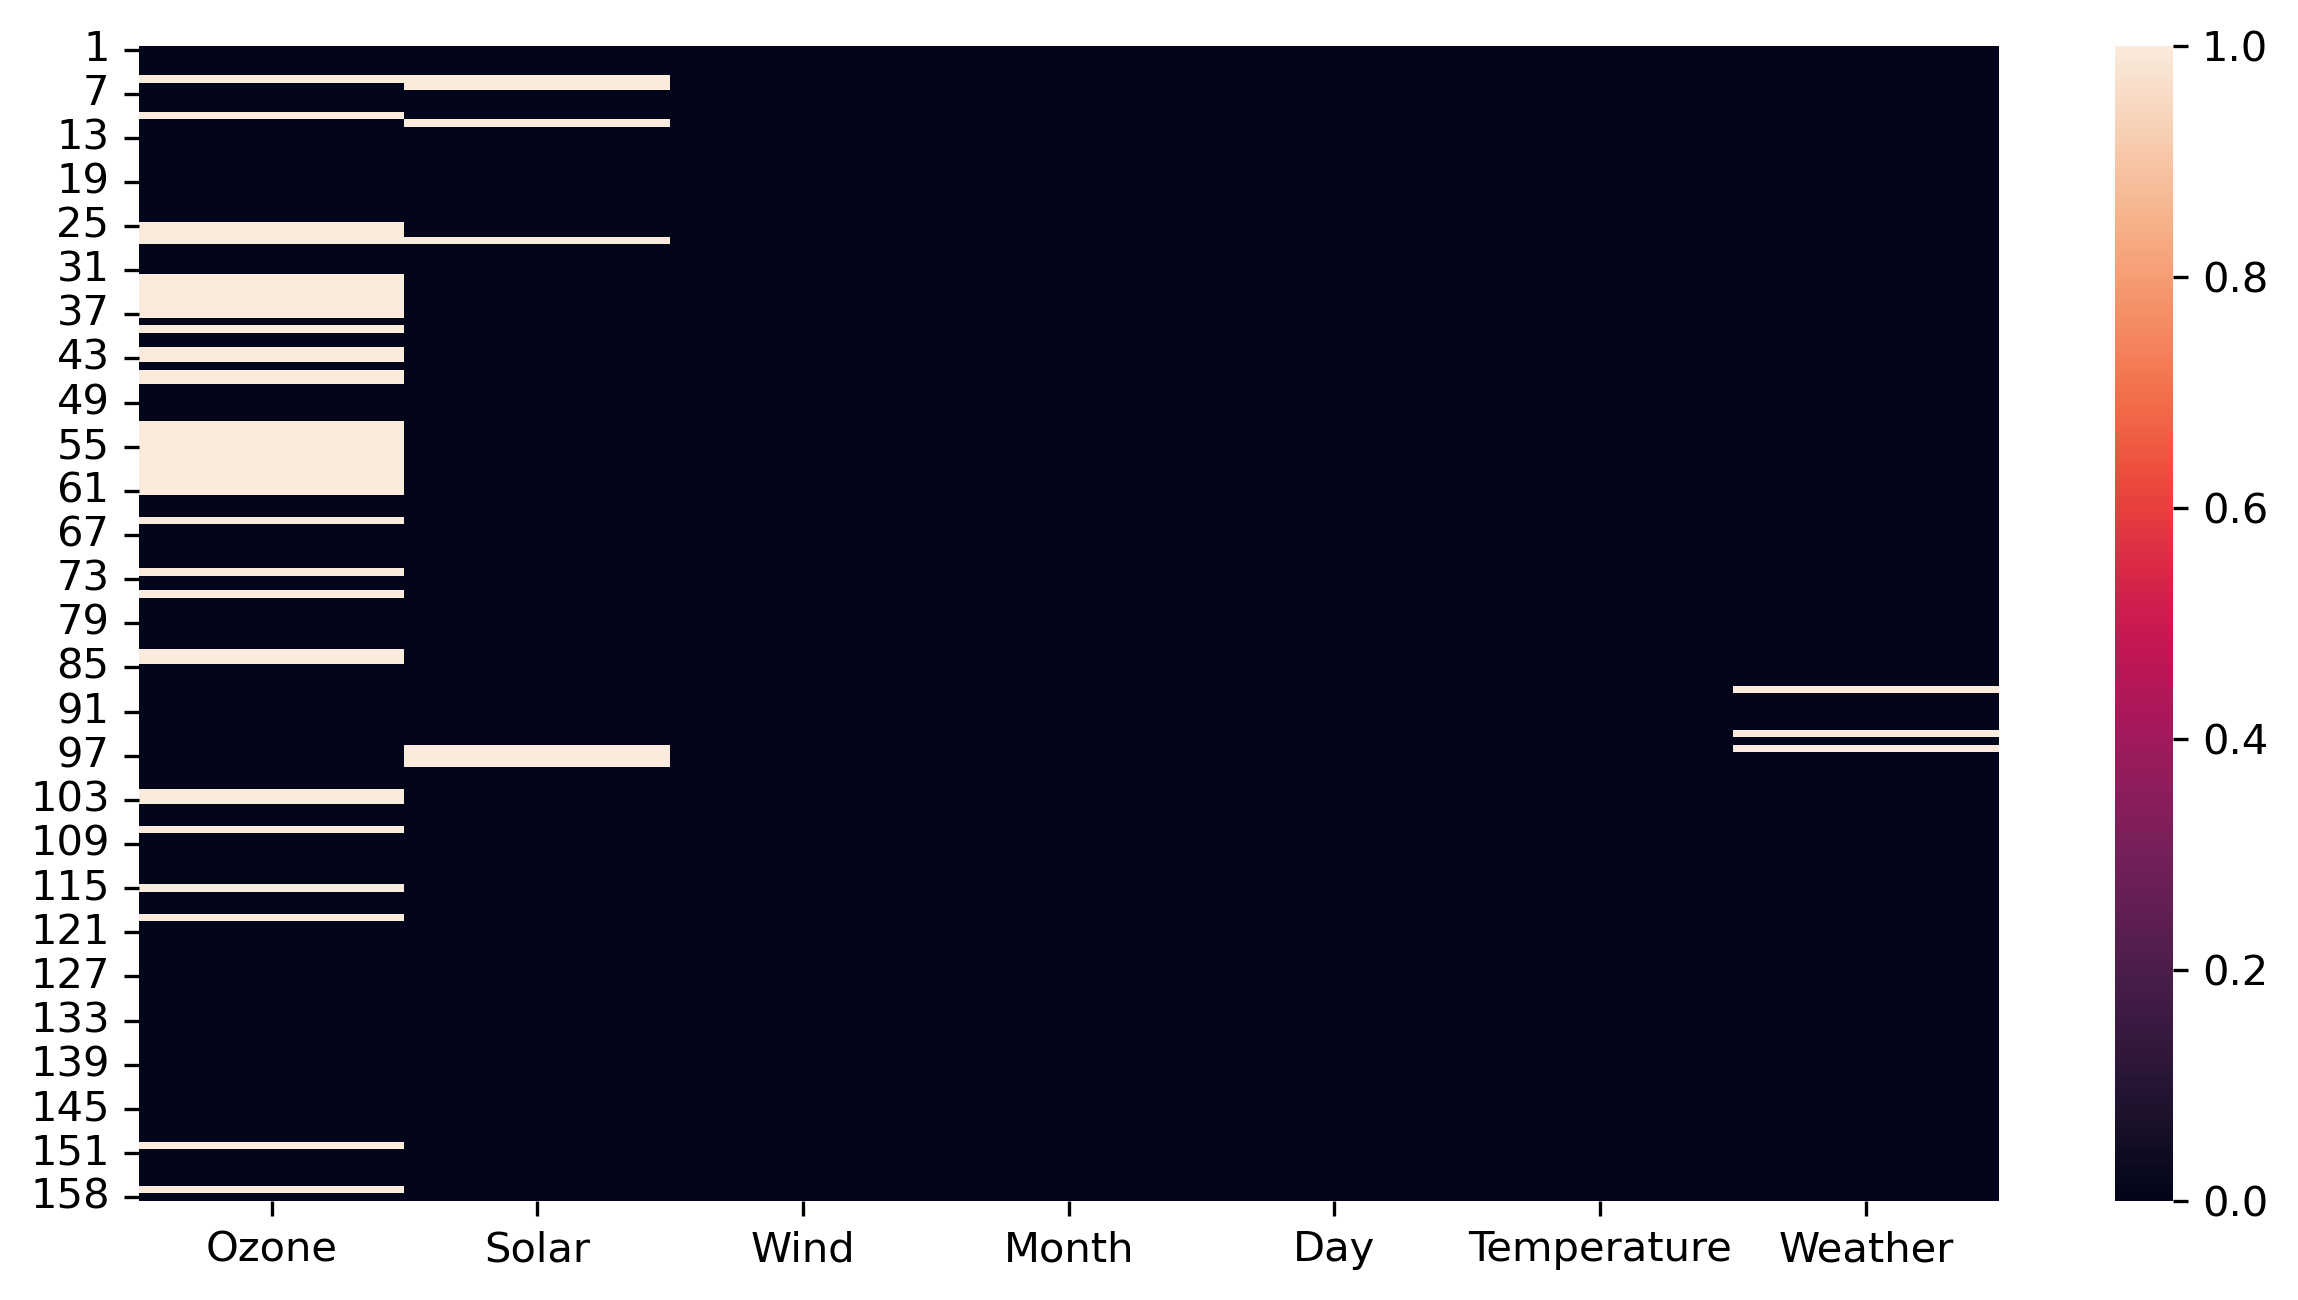

In [51]:
#Visualizing missing values: Heatmap
sns.heatmap(df.isna())

In [52]:
df.isna().sum()  # shows count of missing value in each column

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [53]:
#Calculate the percentage of missing values in each column.
for i in df.isna().sum():
    print((i/len(df))*100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


## Rule for missing value imputation:
1. If NA values are between 1 to 5%, drop na (rows)
2. If NA value are 5 to 40%, fillna(replace)
3. If NA values are greater than 50% in a column, drop that entire column.

In [54]:
df.head()

Ozone  Solar  Wind  Month  Day  Temperature Weather
1   41.0  190.0   7.4      5    1           67       S
2   36.0  118.0   8.0      5    2           72       C
3   12.0  149.0  12.6      5    3           74      PS
4   18.0  313.0  11.5      5    4           62       S
5    NaN    NaN  14.3      5    5           56       S

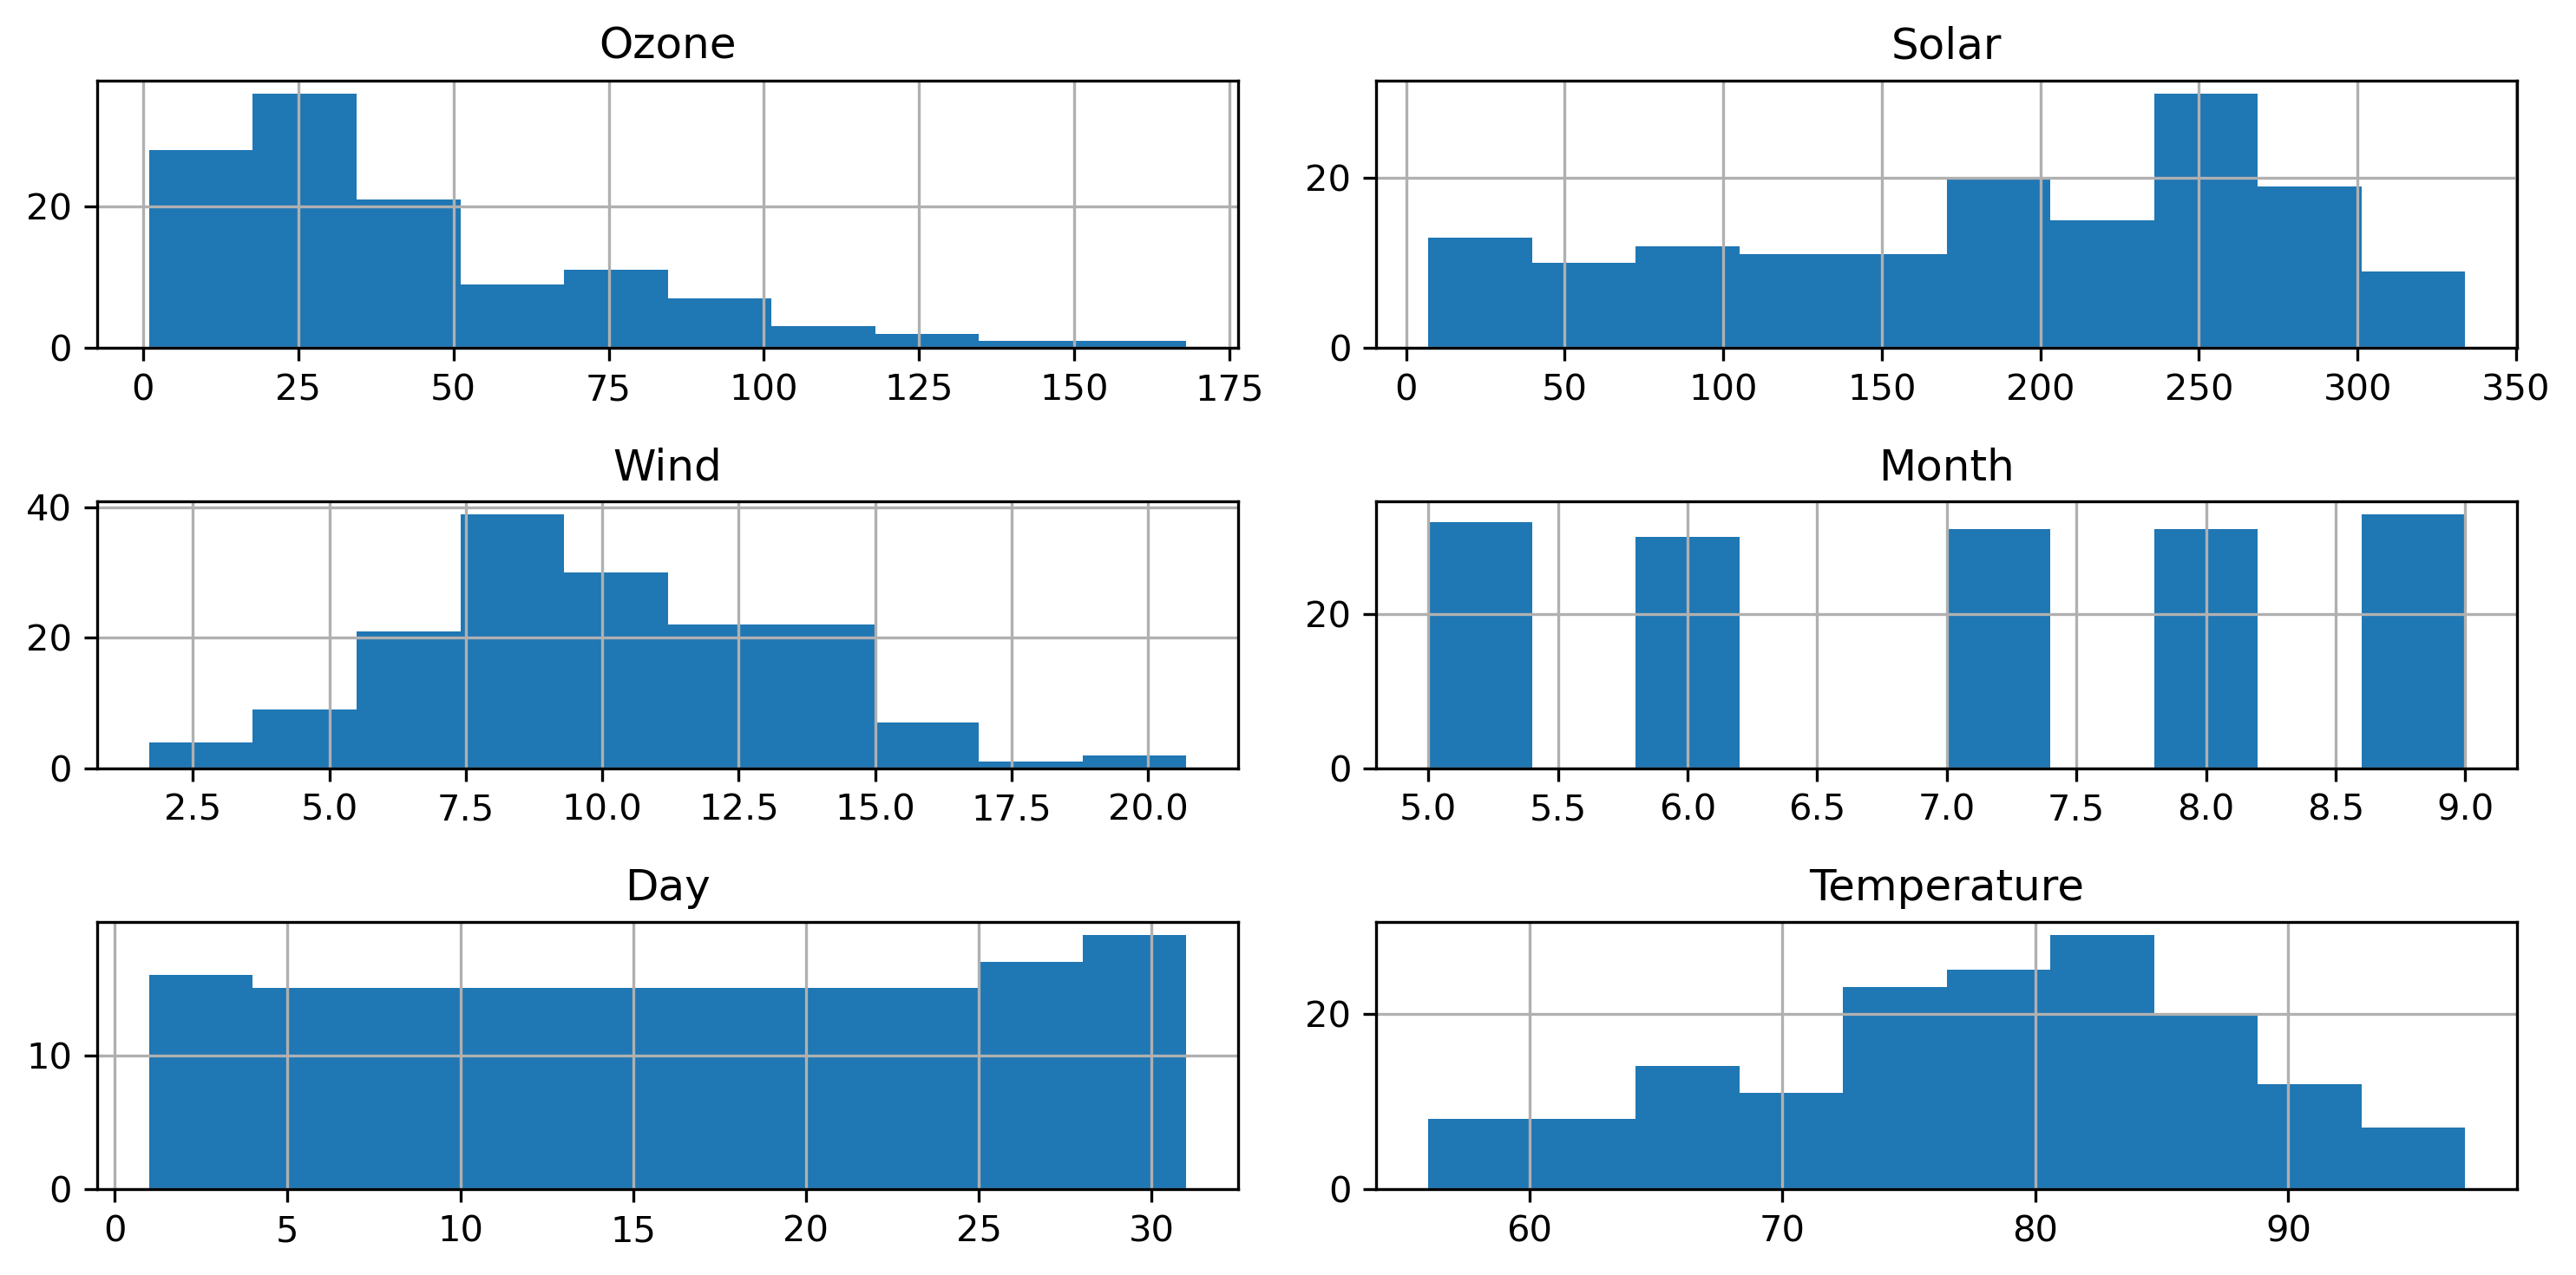

In [55]:
# draw a histrogram to get idea of outliers
df.hist()  
plt.tight_layout()

<Axes: >

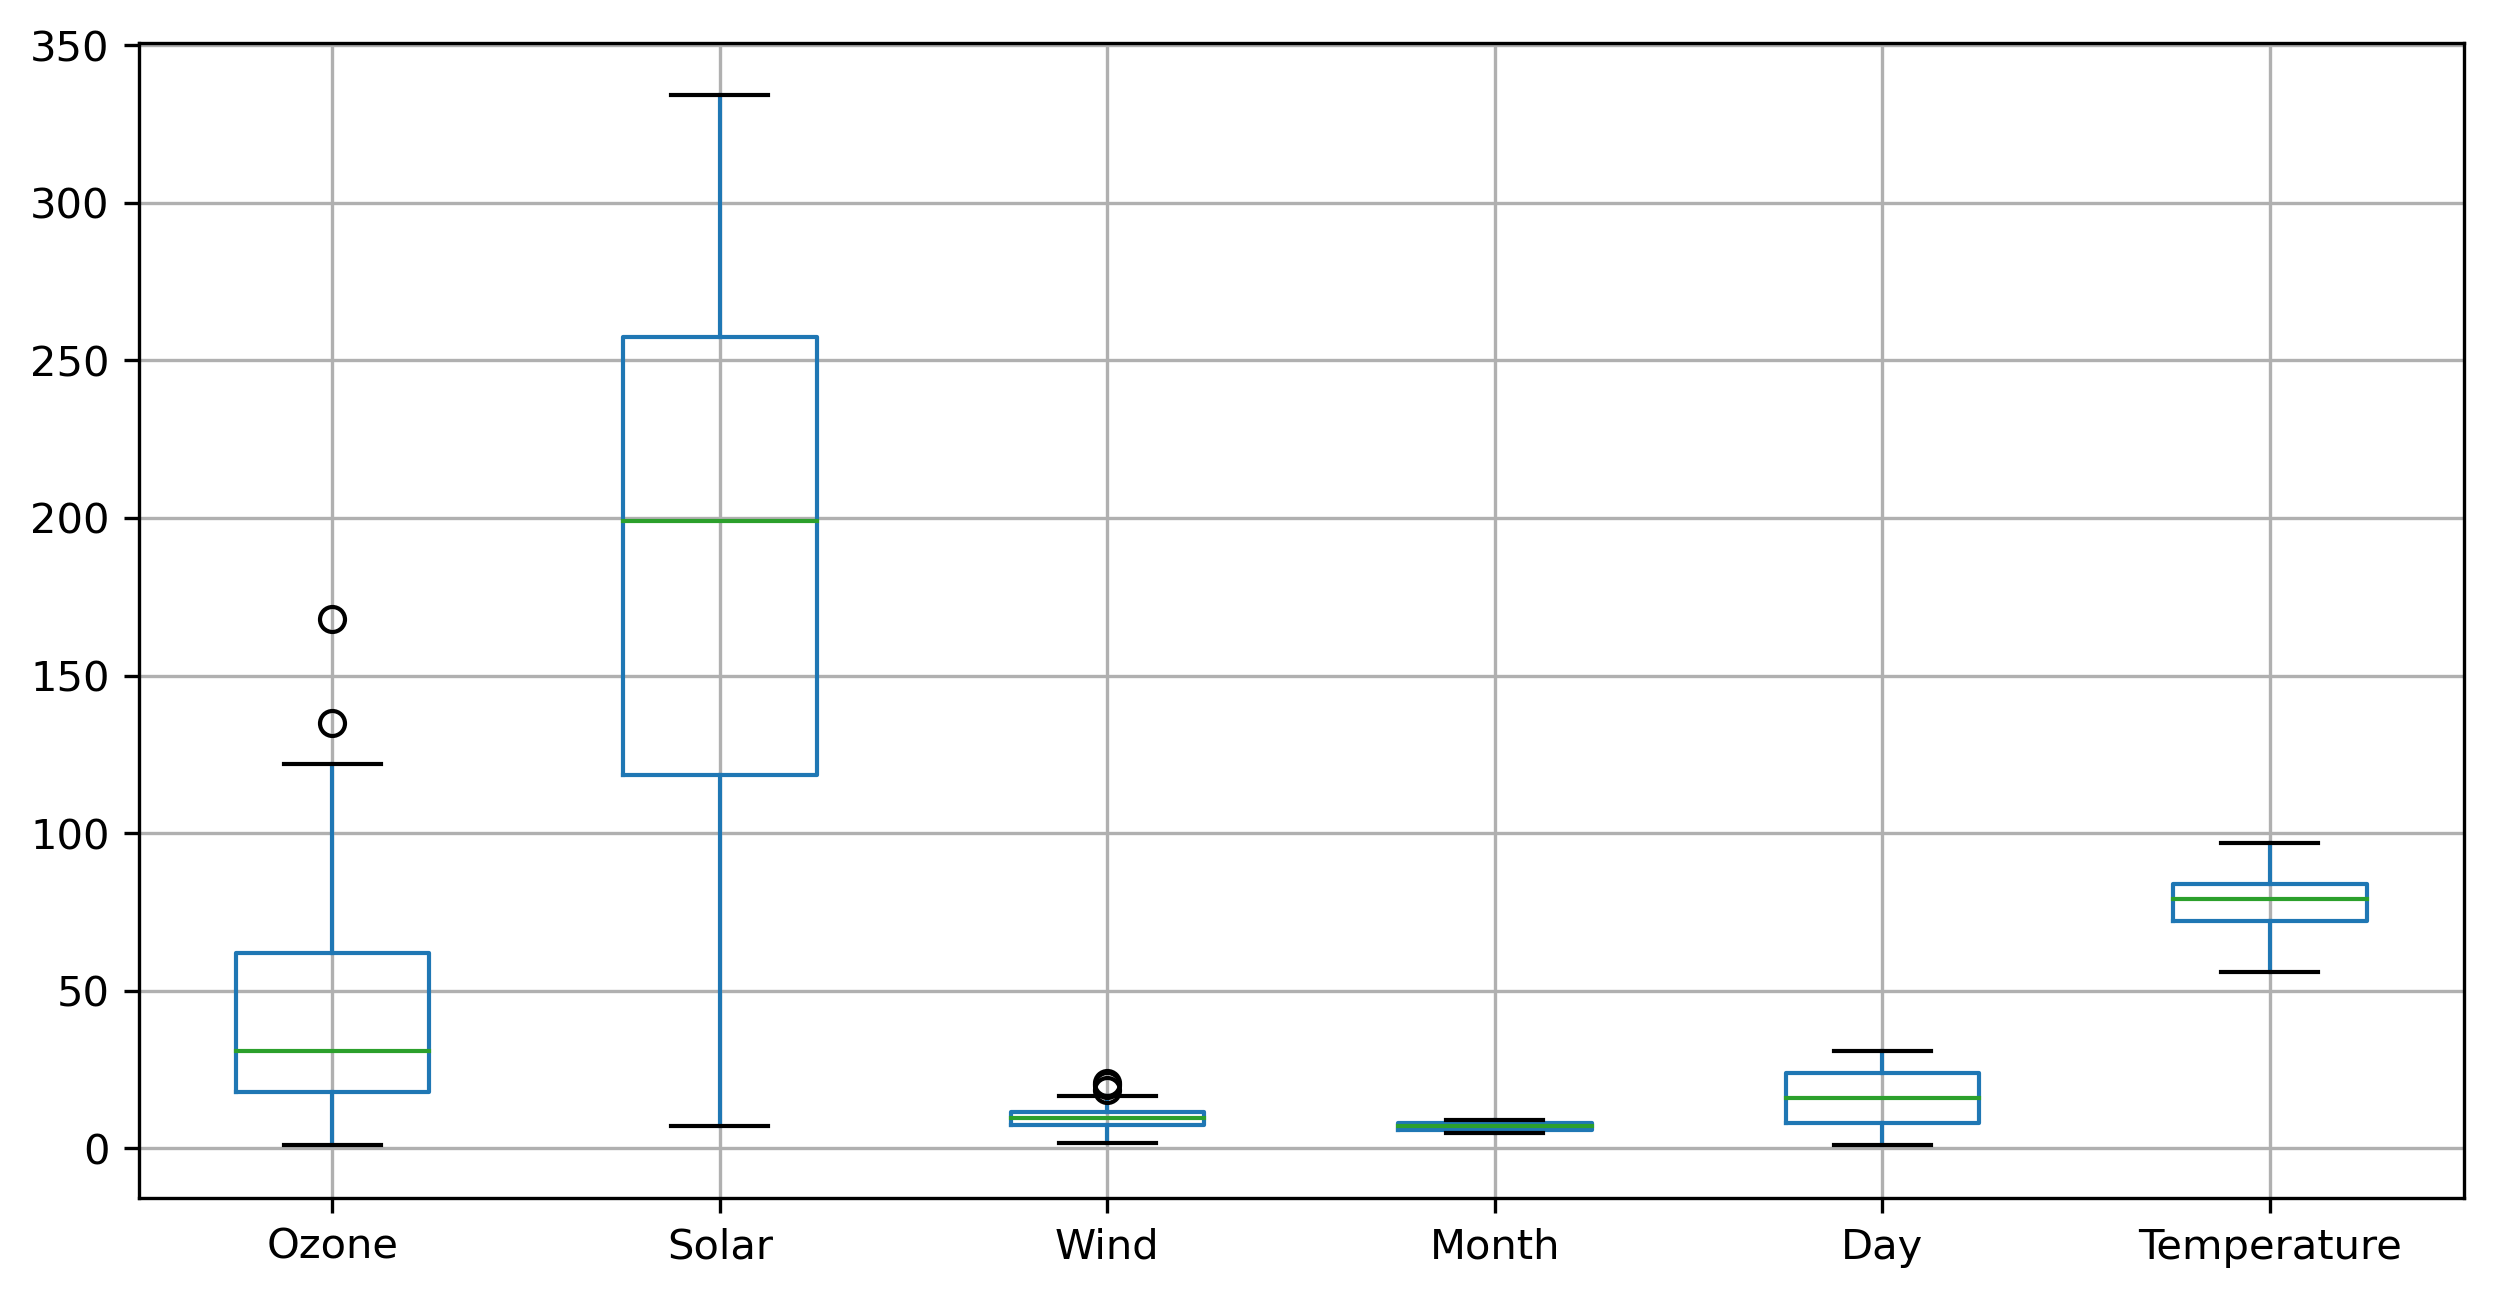

In [56]:
df.boxplot() # to check presence of outliers because of missing values can replace by either mean or median

<Axes: xlabel='Solar'>

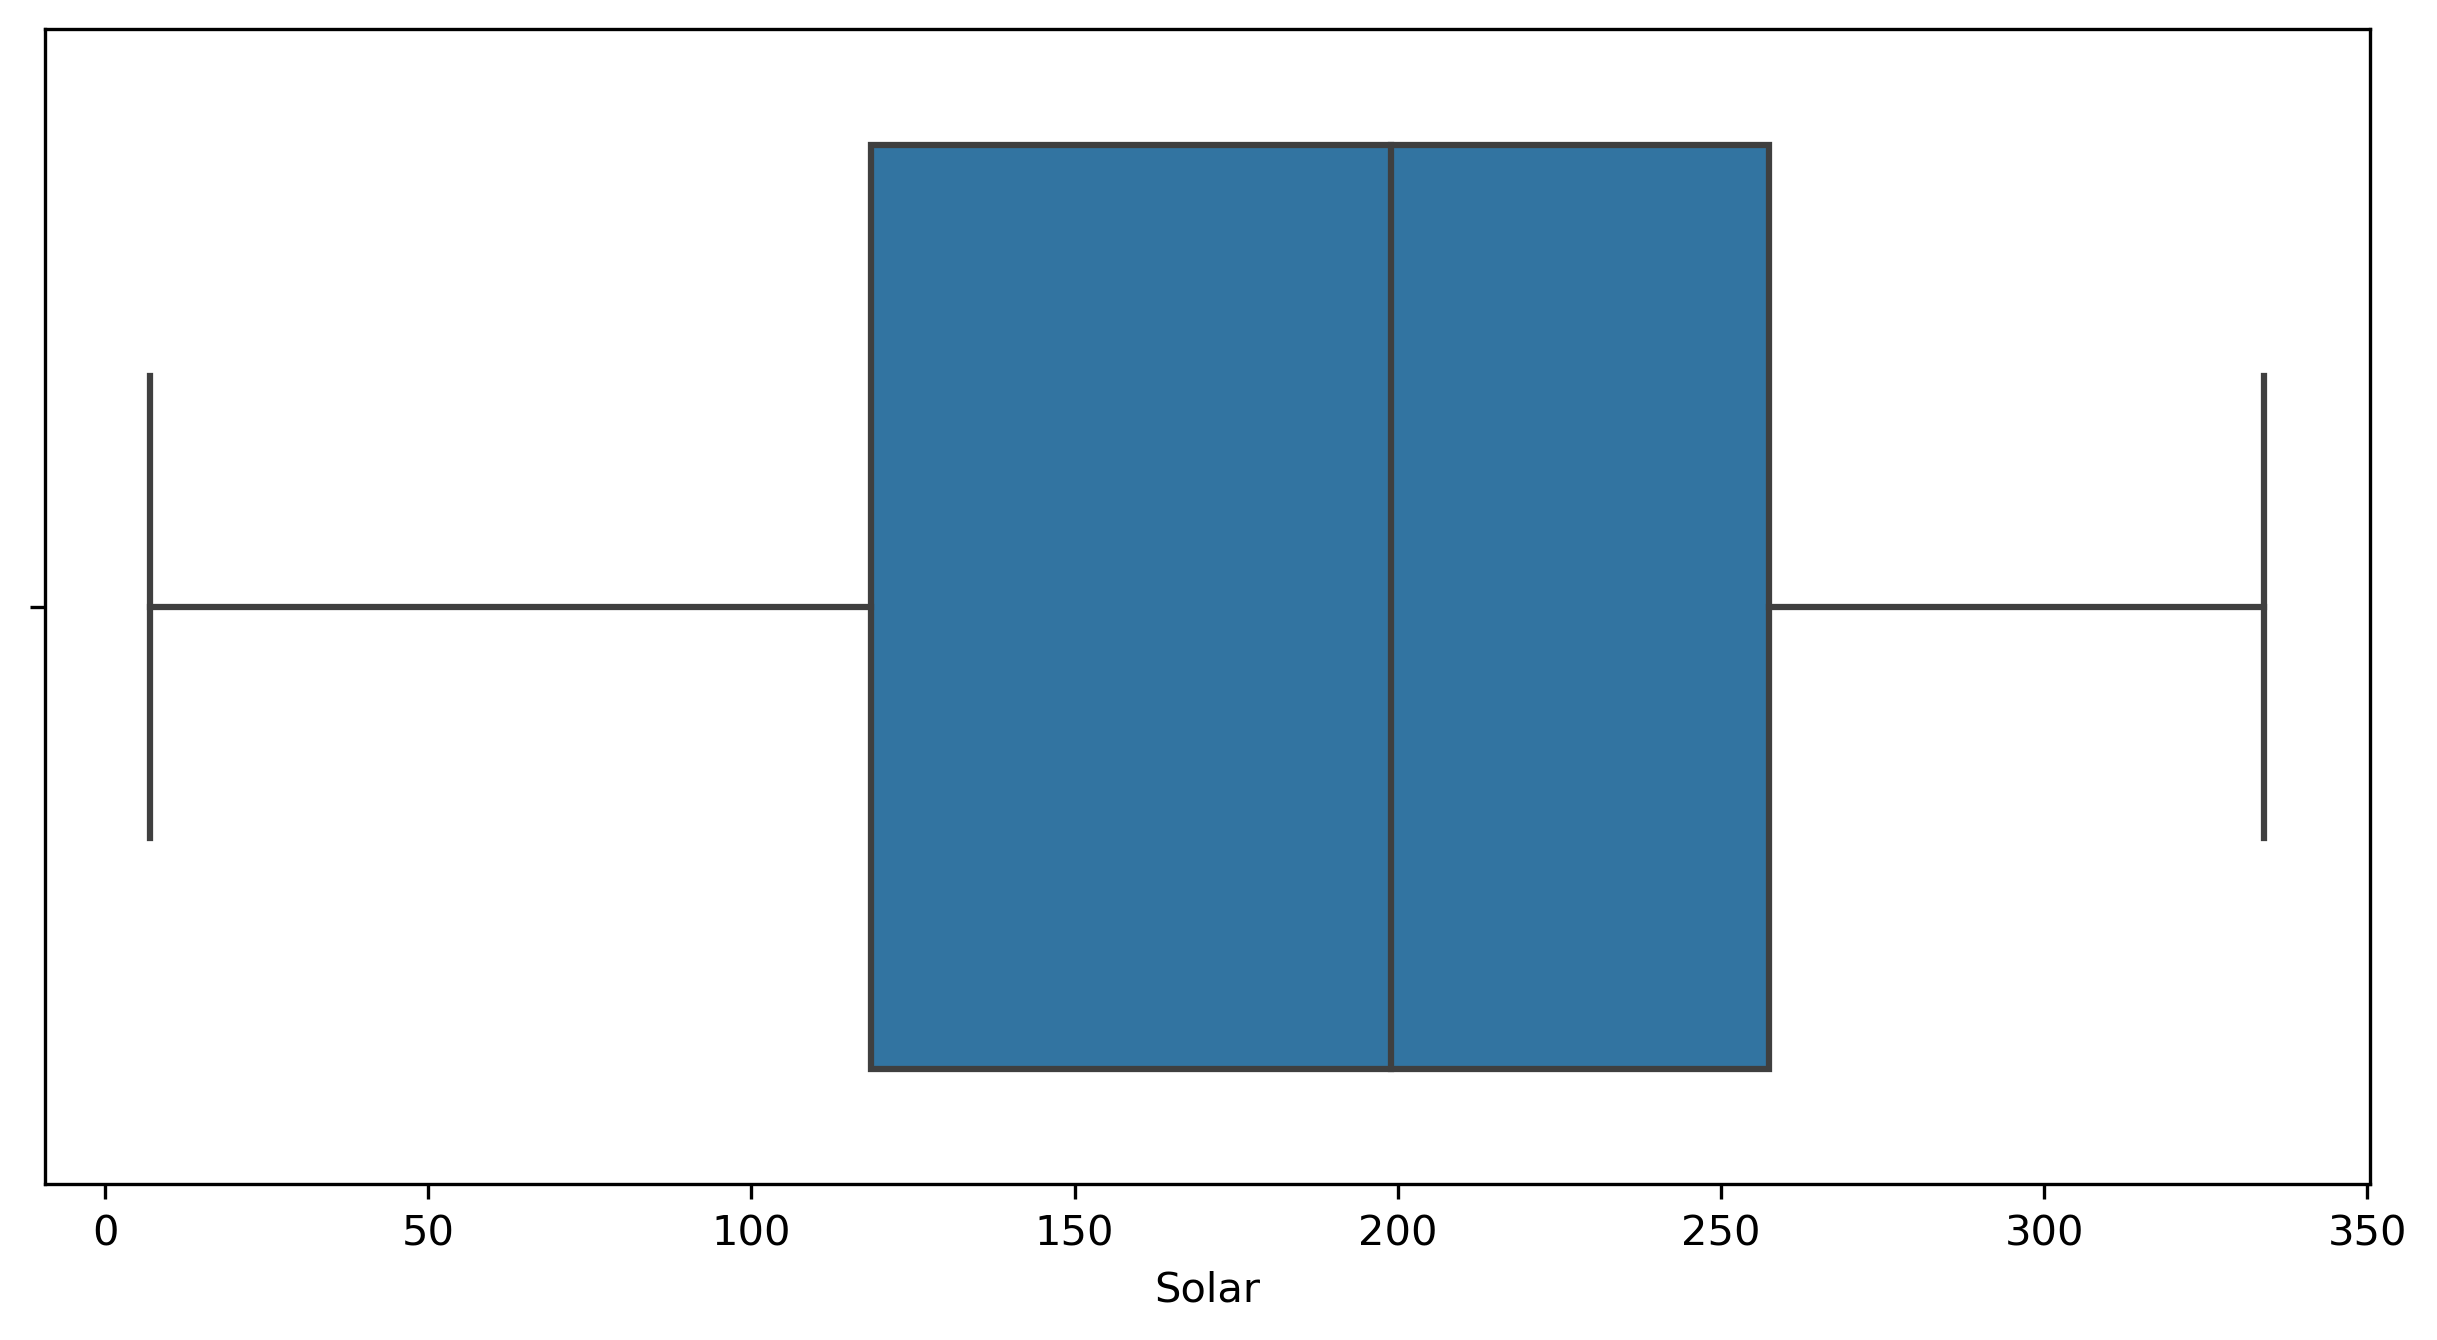

In [57]:
sns.boxplot(x=df['Solar'])

In [58]:
ozone_median = df['Ozone'].median() #calculate median
ozone_median

31.0

In [59]:
df['Ozone'].fillna(ozone_median, inplace=True)  #In ozone column there is an outliers so we replace missing values by median

In [60]:
df.isna().sum() #Here we can see missing values in ozone columns is zero

Ozone          0
Solar          7
Wind           0
Month          0
Day            0
Temperature    0
Weather        3
dtype: int64

In [61]:
df['Solar'].mean() #calculate mean

185.36666666666667

In [62]:
df['Solar'].fillna(df['Solar'].mean(), inplace=True) 
#in solar column outliers are not presented so we can replace missing values by mean

In [63]:
df['Weather'].value_counts() #categorical column. we check freq of unique values

Weather
S     58
C     49
PS    47
Name: count, dtype: int64

In [64]:
df['Weather'].mode() #calculate mode

0    S
Name: Weather, dtype: object

In [65]:
df['Weather'].mode()[0] #calculate mode

'S'

In [66]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
#in weather column we can replace missing values by mode

In [67]:
df.isna().sum()  # here we can see all missing values are removed

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Temperature    0
Weather        0
dtype: int64

## Outlier detection
- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [68]:
df.describe()

Ozone       Solar        Wind       Month         Day  Temperature
count  157.000000  157.000000  157.000000  157.000000  157.000000   157.000000
mean    39.197452  185.366667    9.929936    7.019108   15.929936    77.745223
std     28.781992   86.998999    3.505188    1.434338    8.974404     9.405334
min      1.000000    7.000000    1.700000    5.000000    1.000000    56.000000
25%     21.000000  127.000000    7.400000    6.000000    8.000000    72.000000
50%     31.000000  193.000000    9.700000    7.000000   16.000000    79.000000
75%     45.000000  255.000000   11.500000    8.000000   24.000000    84.000000
max    168.000000  334.000000   20.700000    9.000000   31.000000    97.000000

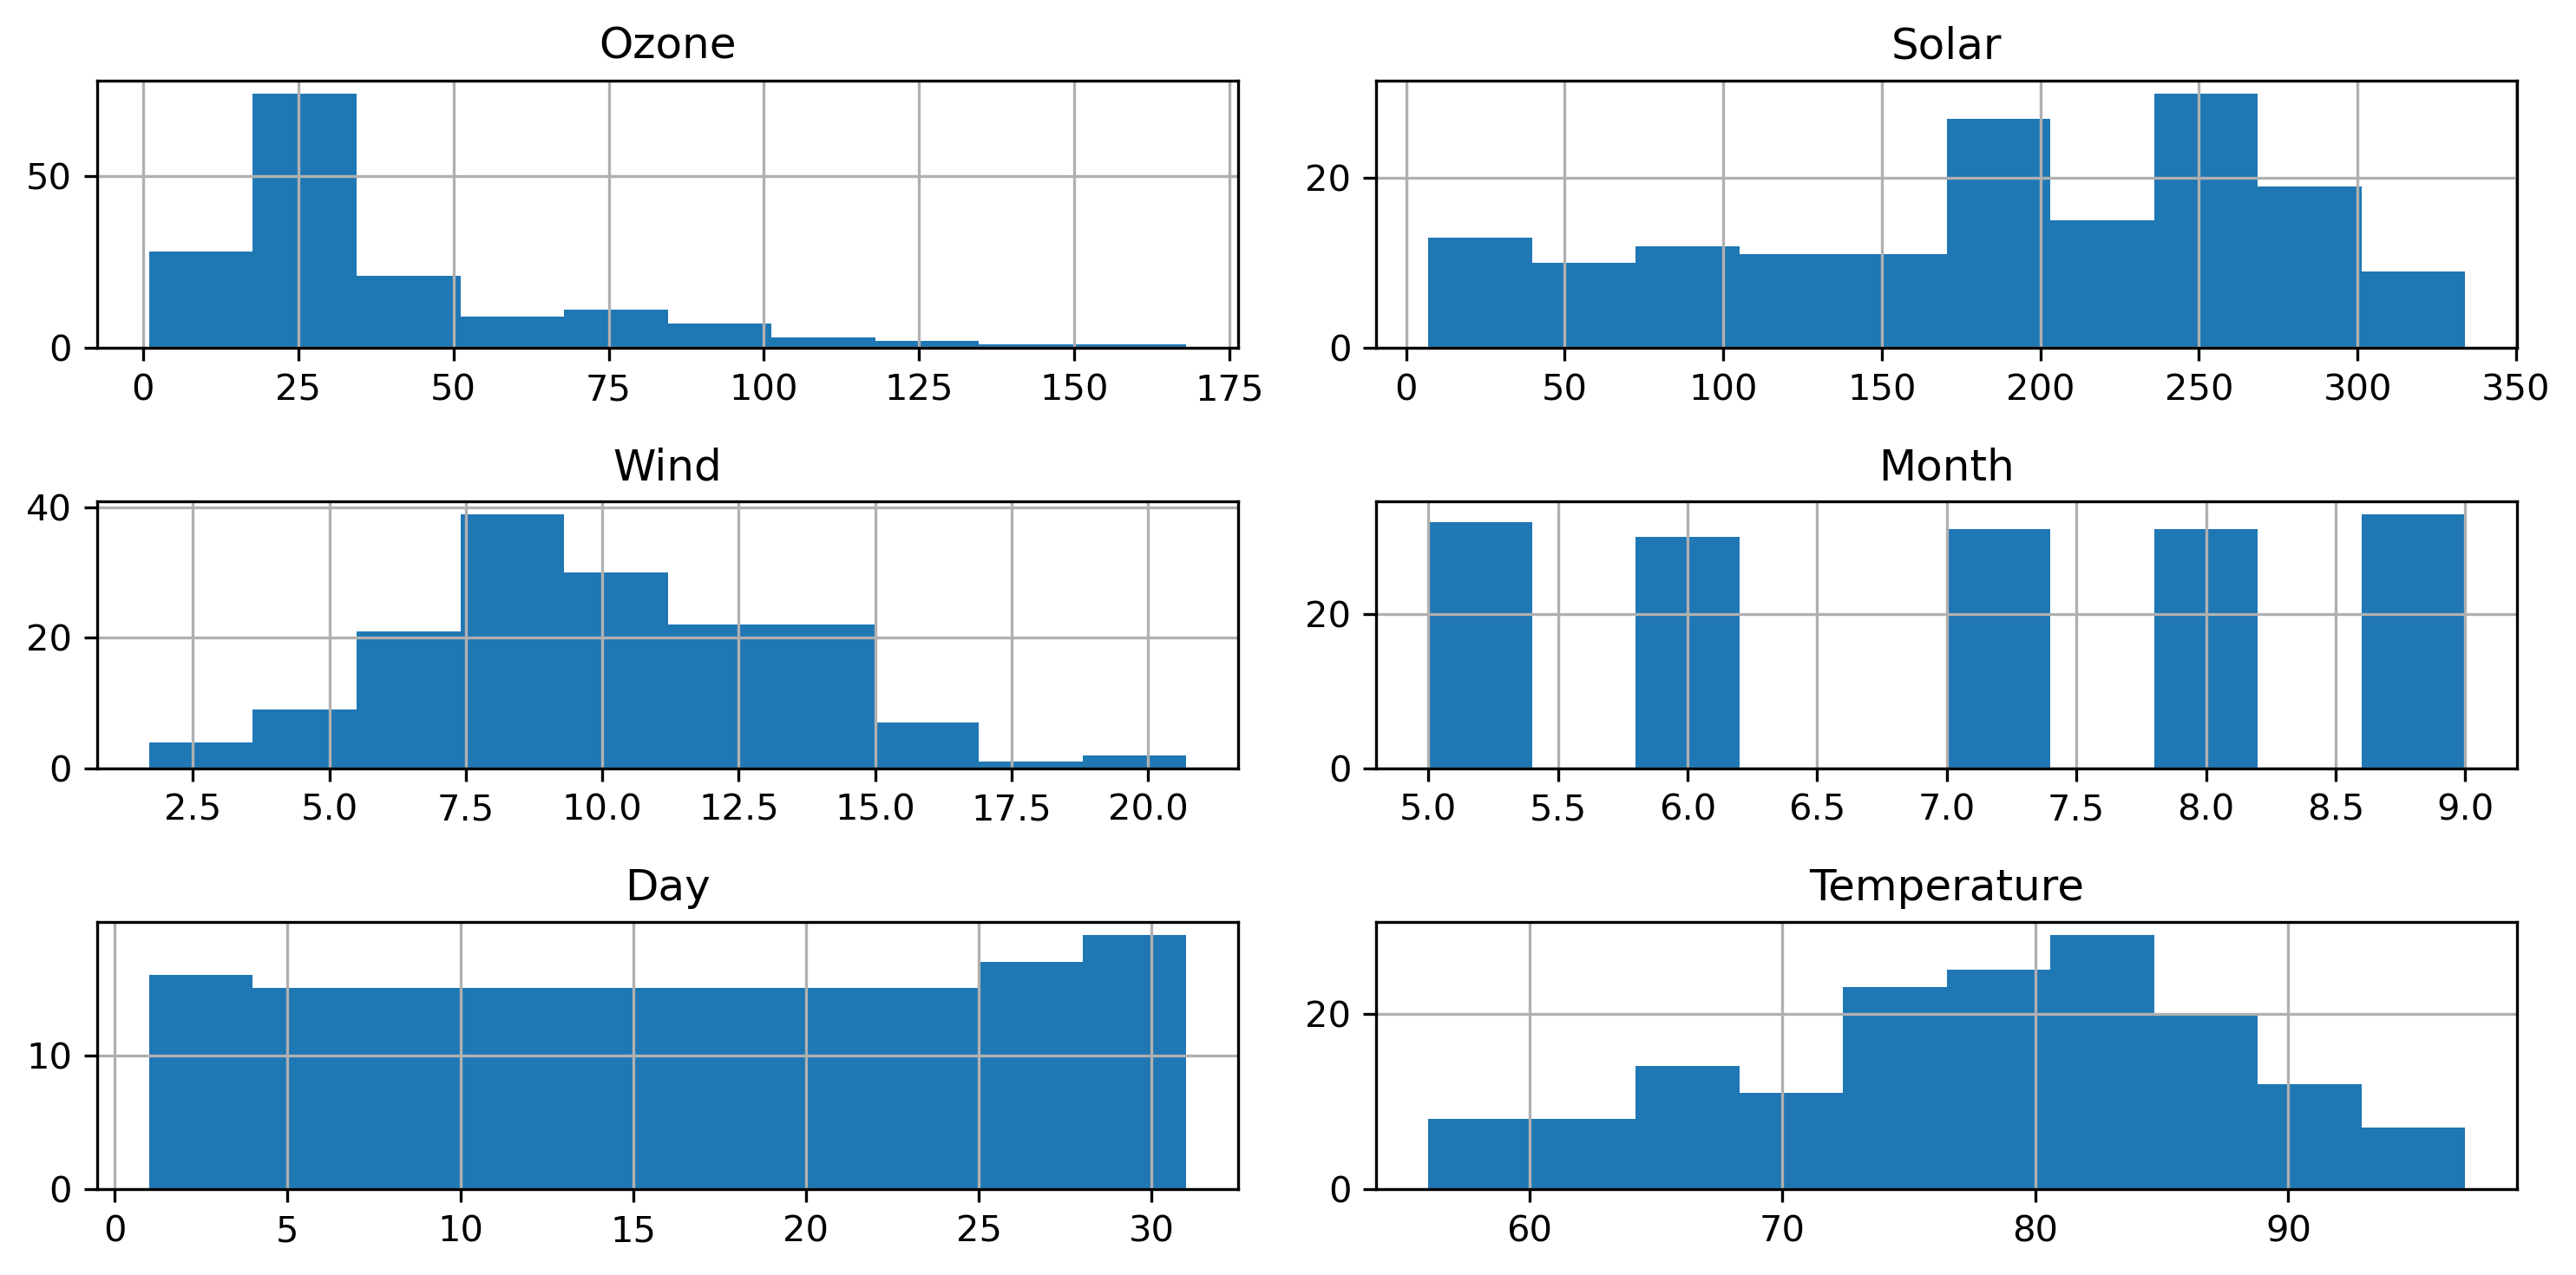

In [69]:
# to get idea about presence of outliers
df.hist()
plt.tight_layout()

<Axes: >

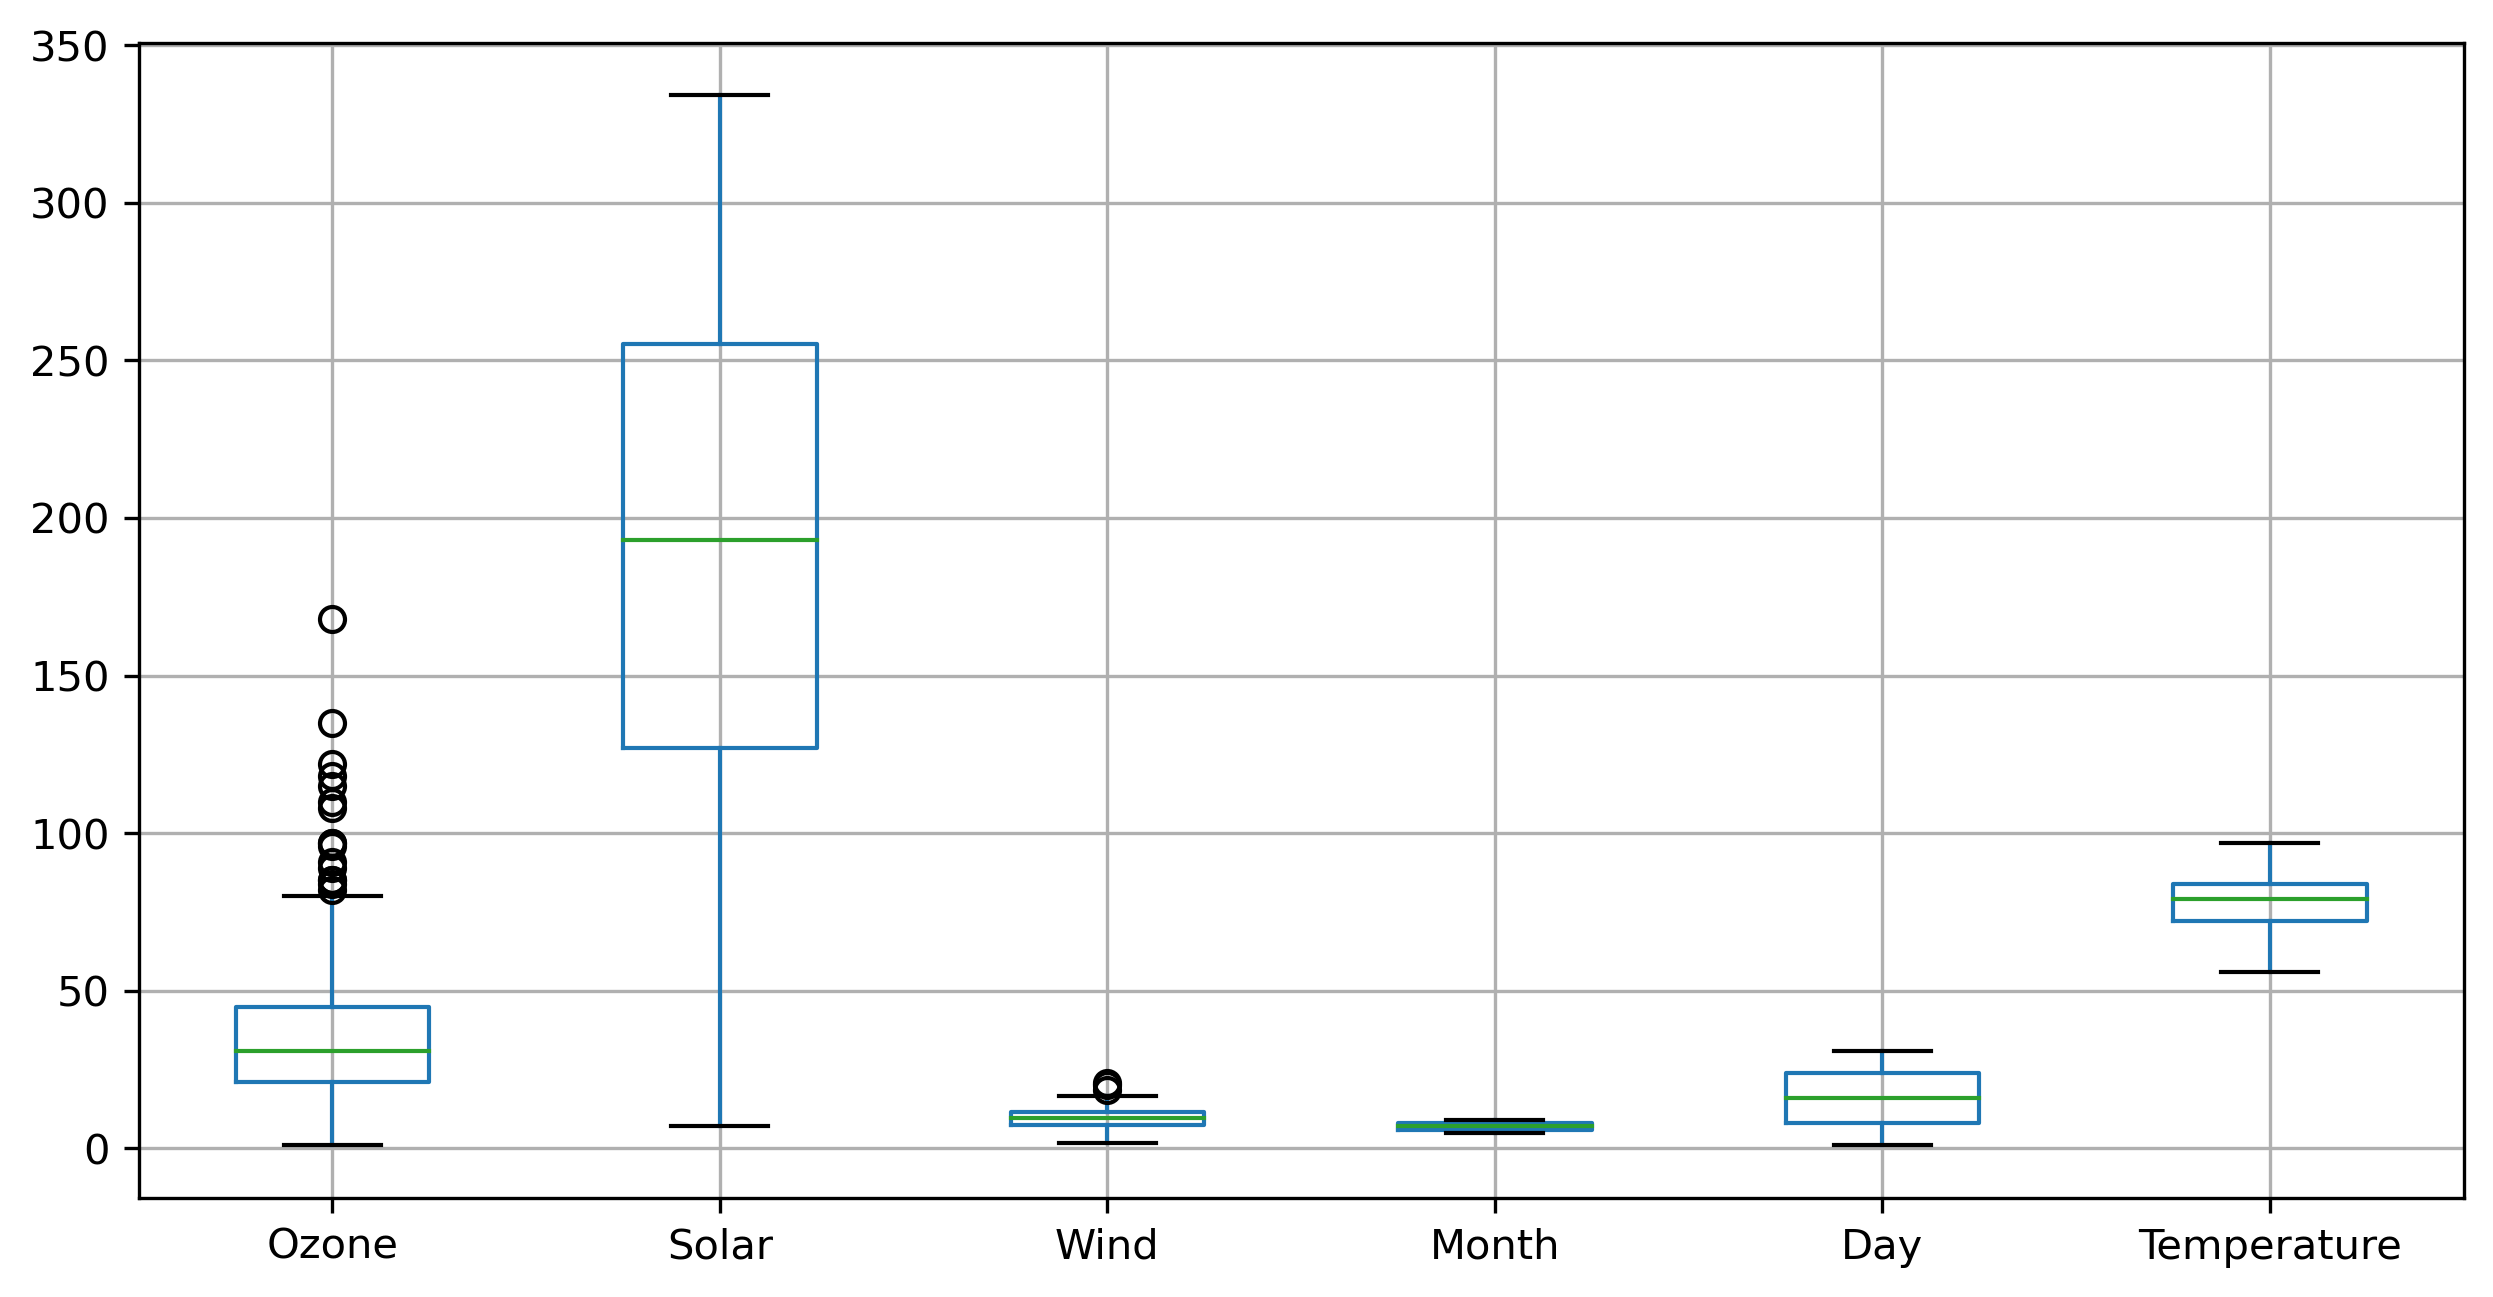

In [70]:
df.boxplot()  #detection of outliers

<Axes: xlabel='Ozone'>

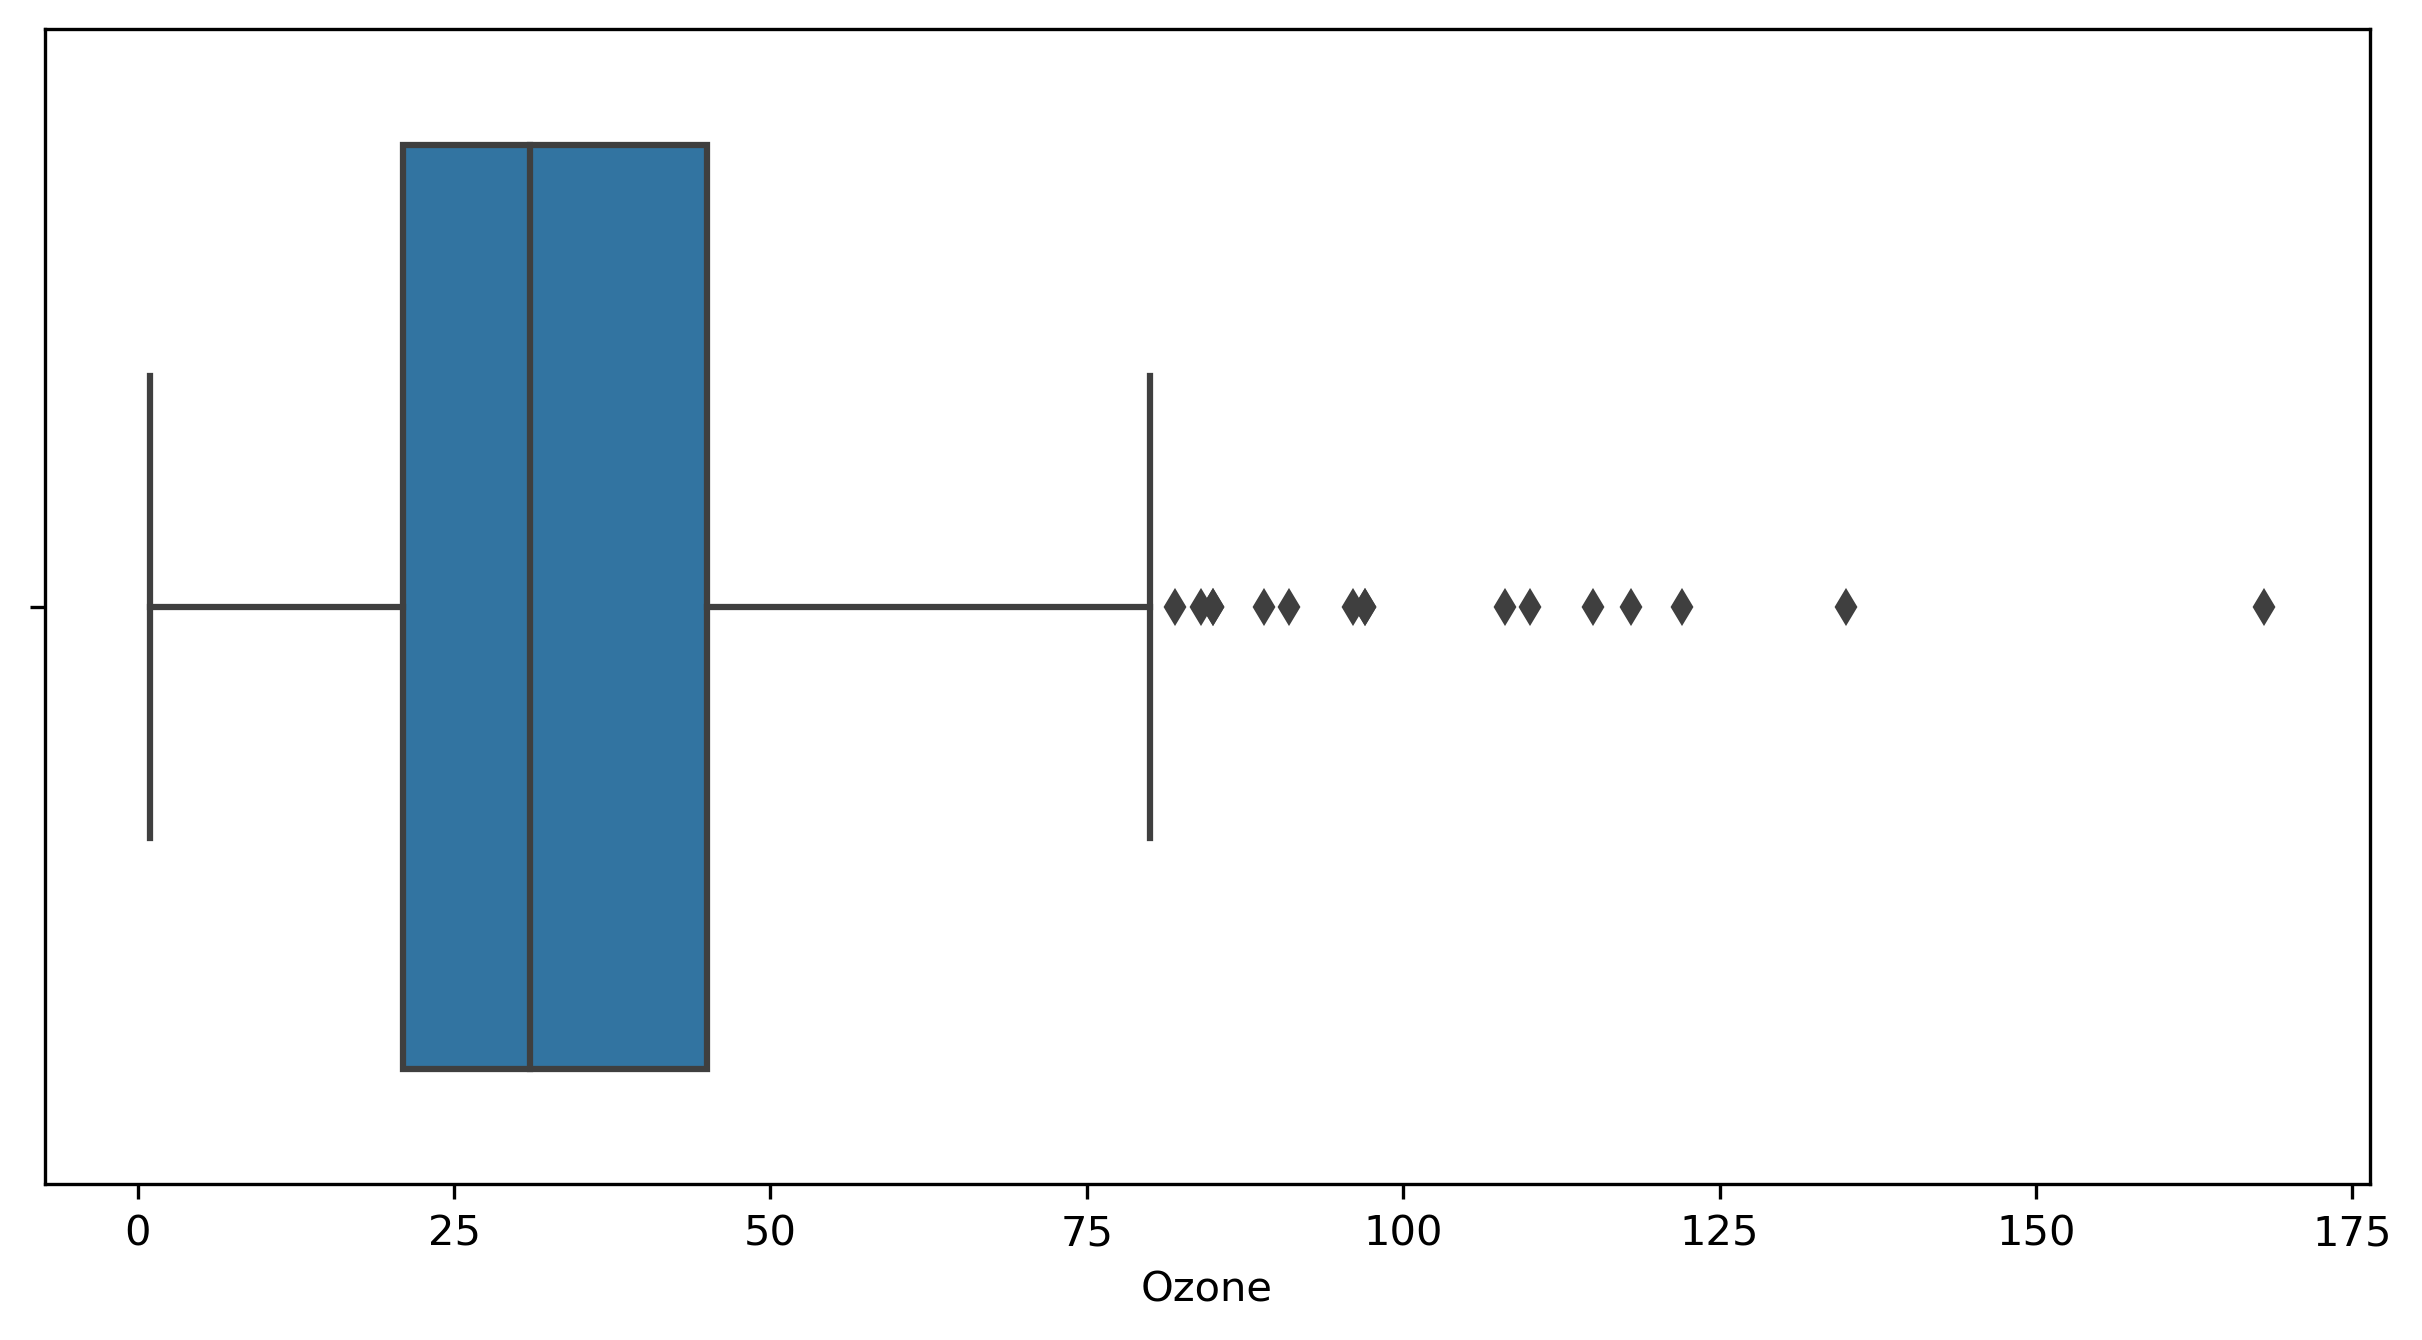

In [71]:
sns.boxplot(x=df['Ozone'])

In [72]:
#Outlier detection function
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper
# this done for capping method where lower side outliers replace by lower extreme value lly for RHS

In [73]:
outlier_detection(df,'Ozone')  #lower and upper extreme of ozone column

(-15.0, 81.0)

In [74]:
df[df['Ozone']>81.0] #it shows all entries of ozone where value >81.0

Ozone  Solar  Wind  Month  Day  Temperature Weather
30   115.0  223.0   5.7      5   30           79       C
62   135.0  269.0   4.1      7    1           84       S
69    97.0  267.0   6.3      7    8           92      PS
70    97.0  272.0   5.7      7    9           92       C
71    85.0  175.0   7.4      7   10           89      PS
86   108.0  223.0   8.0      7   25           85      PS
89    82.0  213.0   7.4      7   28           88       S
99   122.0  255.0   4.0      8    7           89       C
100   89.0  229.0  10.3      8    8           90      PS
101  110.0  207.0   8.0      8    9           90       C
117  168.0  238.0   3.4      8   25           81      PS
121  118.0  225.0   2.3      8   29           94       S
122   84.0  237.0   6.3      8   30           96       S
123   85.0  188.0   6.3      8   31           94       C
124   96.0  167.0   6.9      9    1           91       C
127   91.0  189.0   4.6      9    4           93      PS

In [75]:
len(df[df['Ozone']>81.0])  #it gives count of how many values are > 81

16

In [76]:
df.loc[df['Ozone'] > 81.0,'Ozone'] # we want only ozone column so extract it by loc function

30     115.0
62     135.0
69      97.0
70      97.0
71      85.0
86     108.0
89      82.0
99     122.0
100     89.0
101    110.0
117    168.0
121    118.0
122     84.0
123     85.0
124     96.0
127     91.0
Name: Ozone, dtype: float64

- Capping Outliers

In [77]:
df.loc[df['Ozone']>81.0,'Ozone'] = 81.0 # Assign 81 value to each entry of above output

<Axes: xlabel='Ozone'>

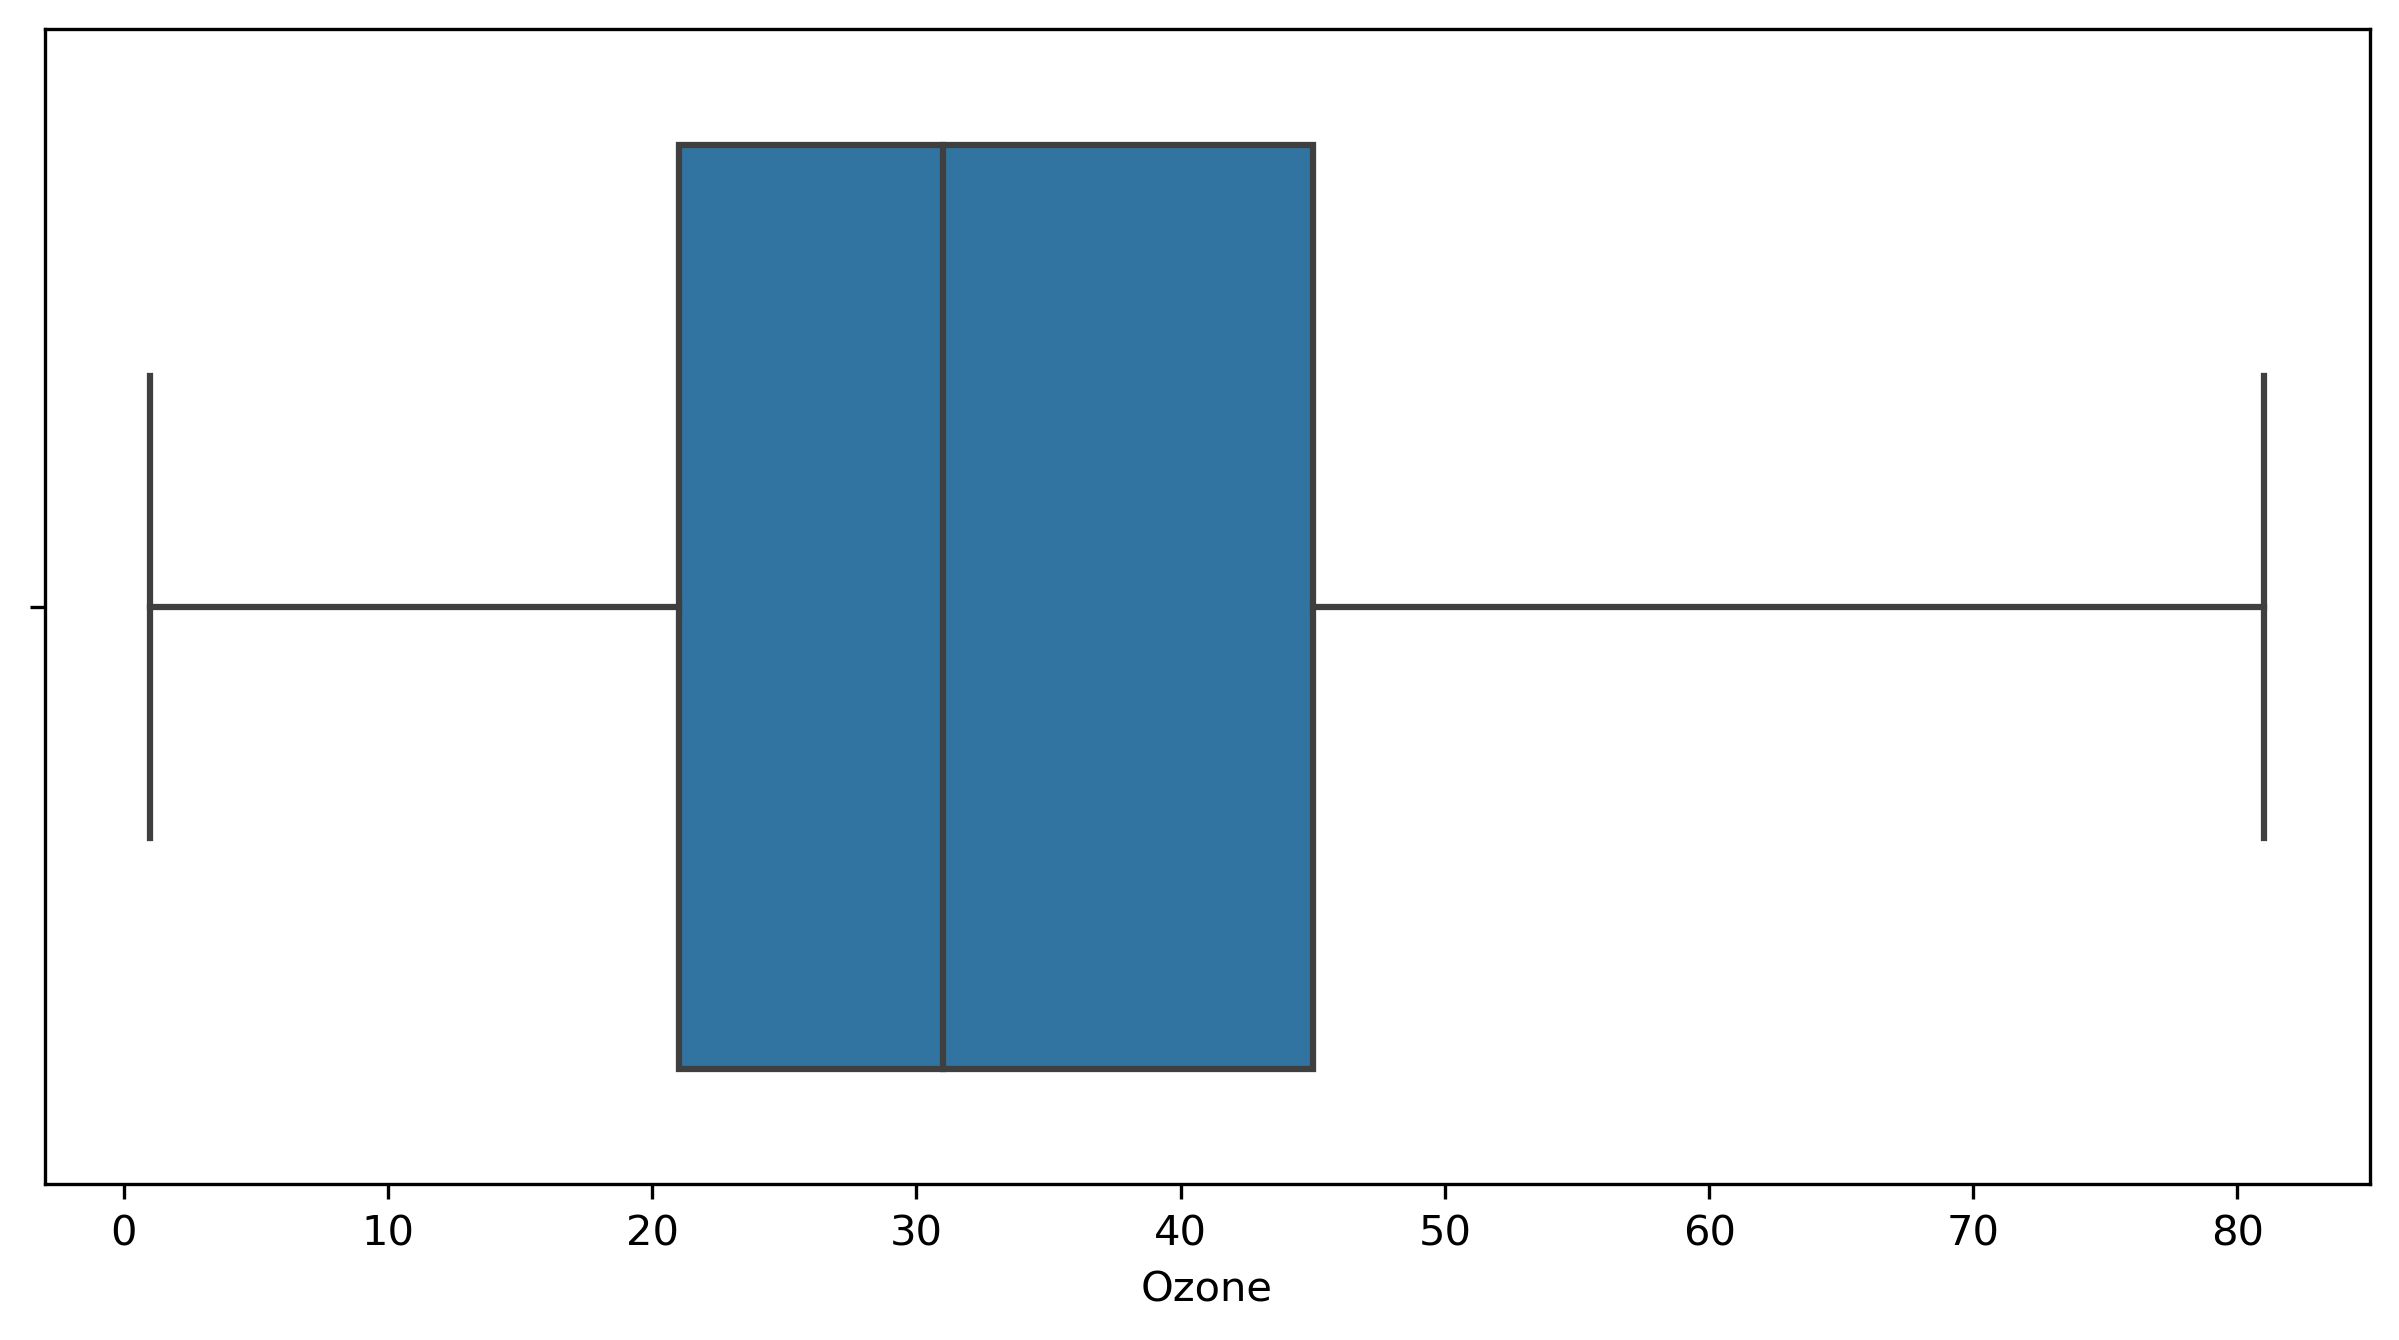

In [78]:
sns.boxplot(x=df['Ozone'])

<Axes: xlabel='Wind'>

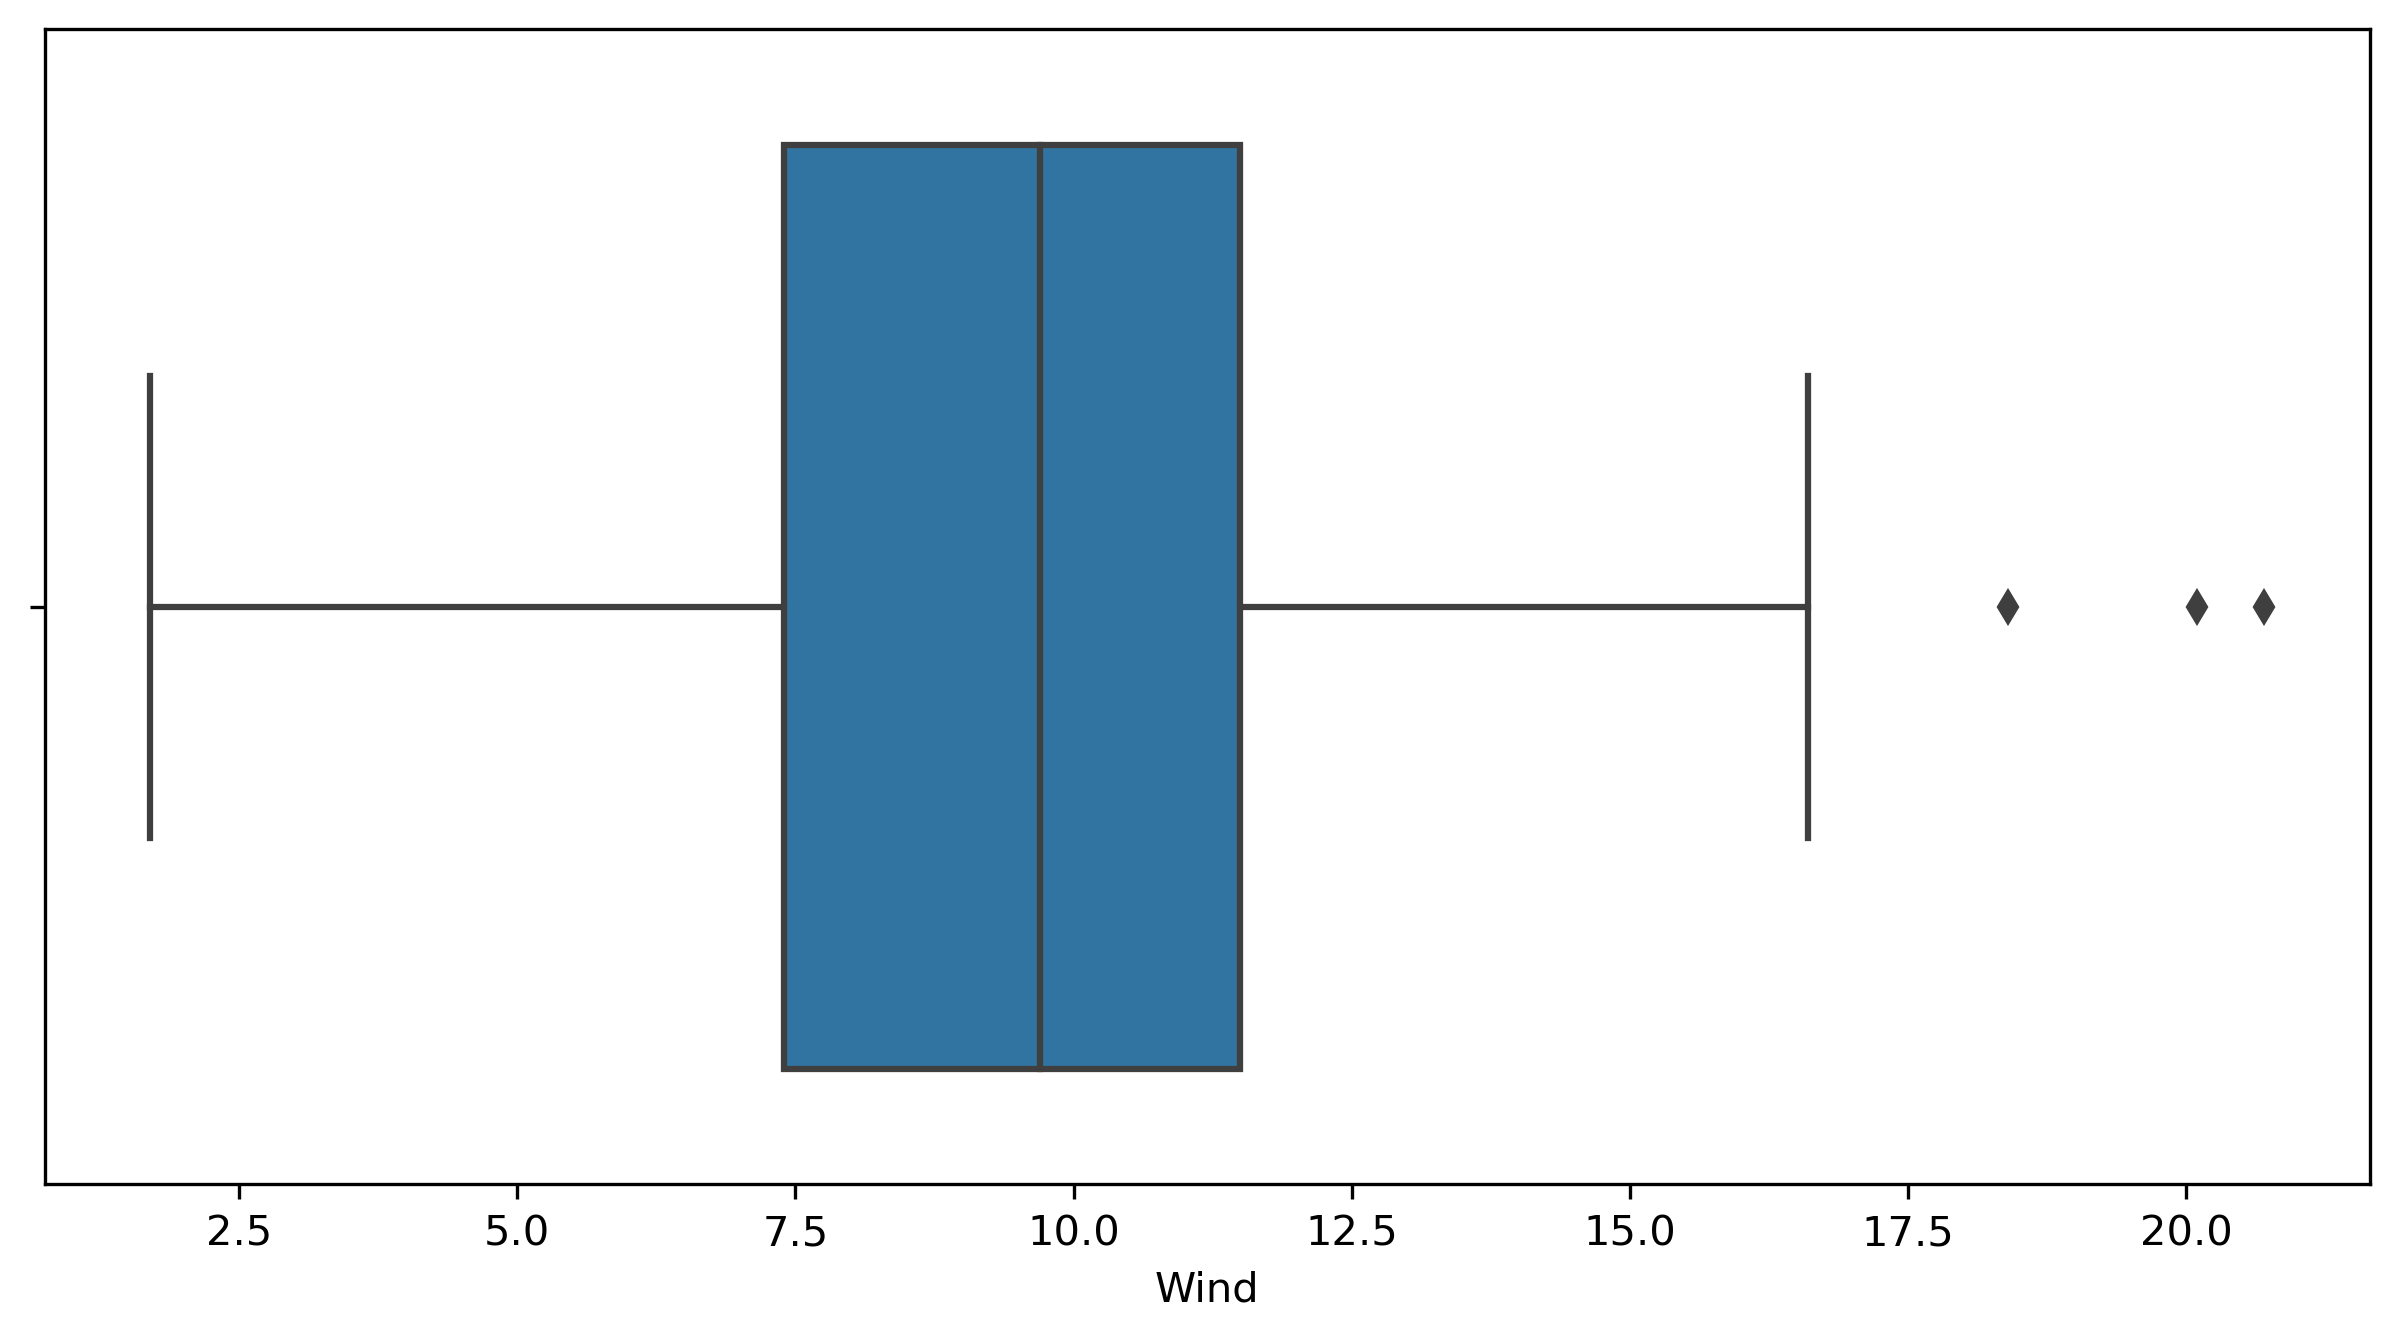

In [79]:
sns.boxplot(x=df['Wind'])

In [80]:
df[df['Wind'] > 17.65]

Ozone  Solar  Wind  Month  Day  Temperature Weather
9     8.0   19.0  20.1      5    9           61      PS
18    6.0   78.0  18.4      5   18           57       C
48   37.0  284.0  20.7      6   17           72       C

In [81]:
# Selecting normal record only not outliers record
# data = df[df['Wind'] > 17.65]
#data

In [82]:
df.loc[df['Wind']>17.65,'Wind'] = 17.65

<Axes: >

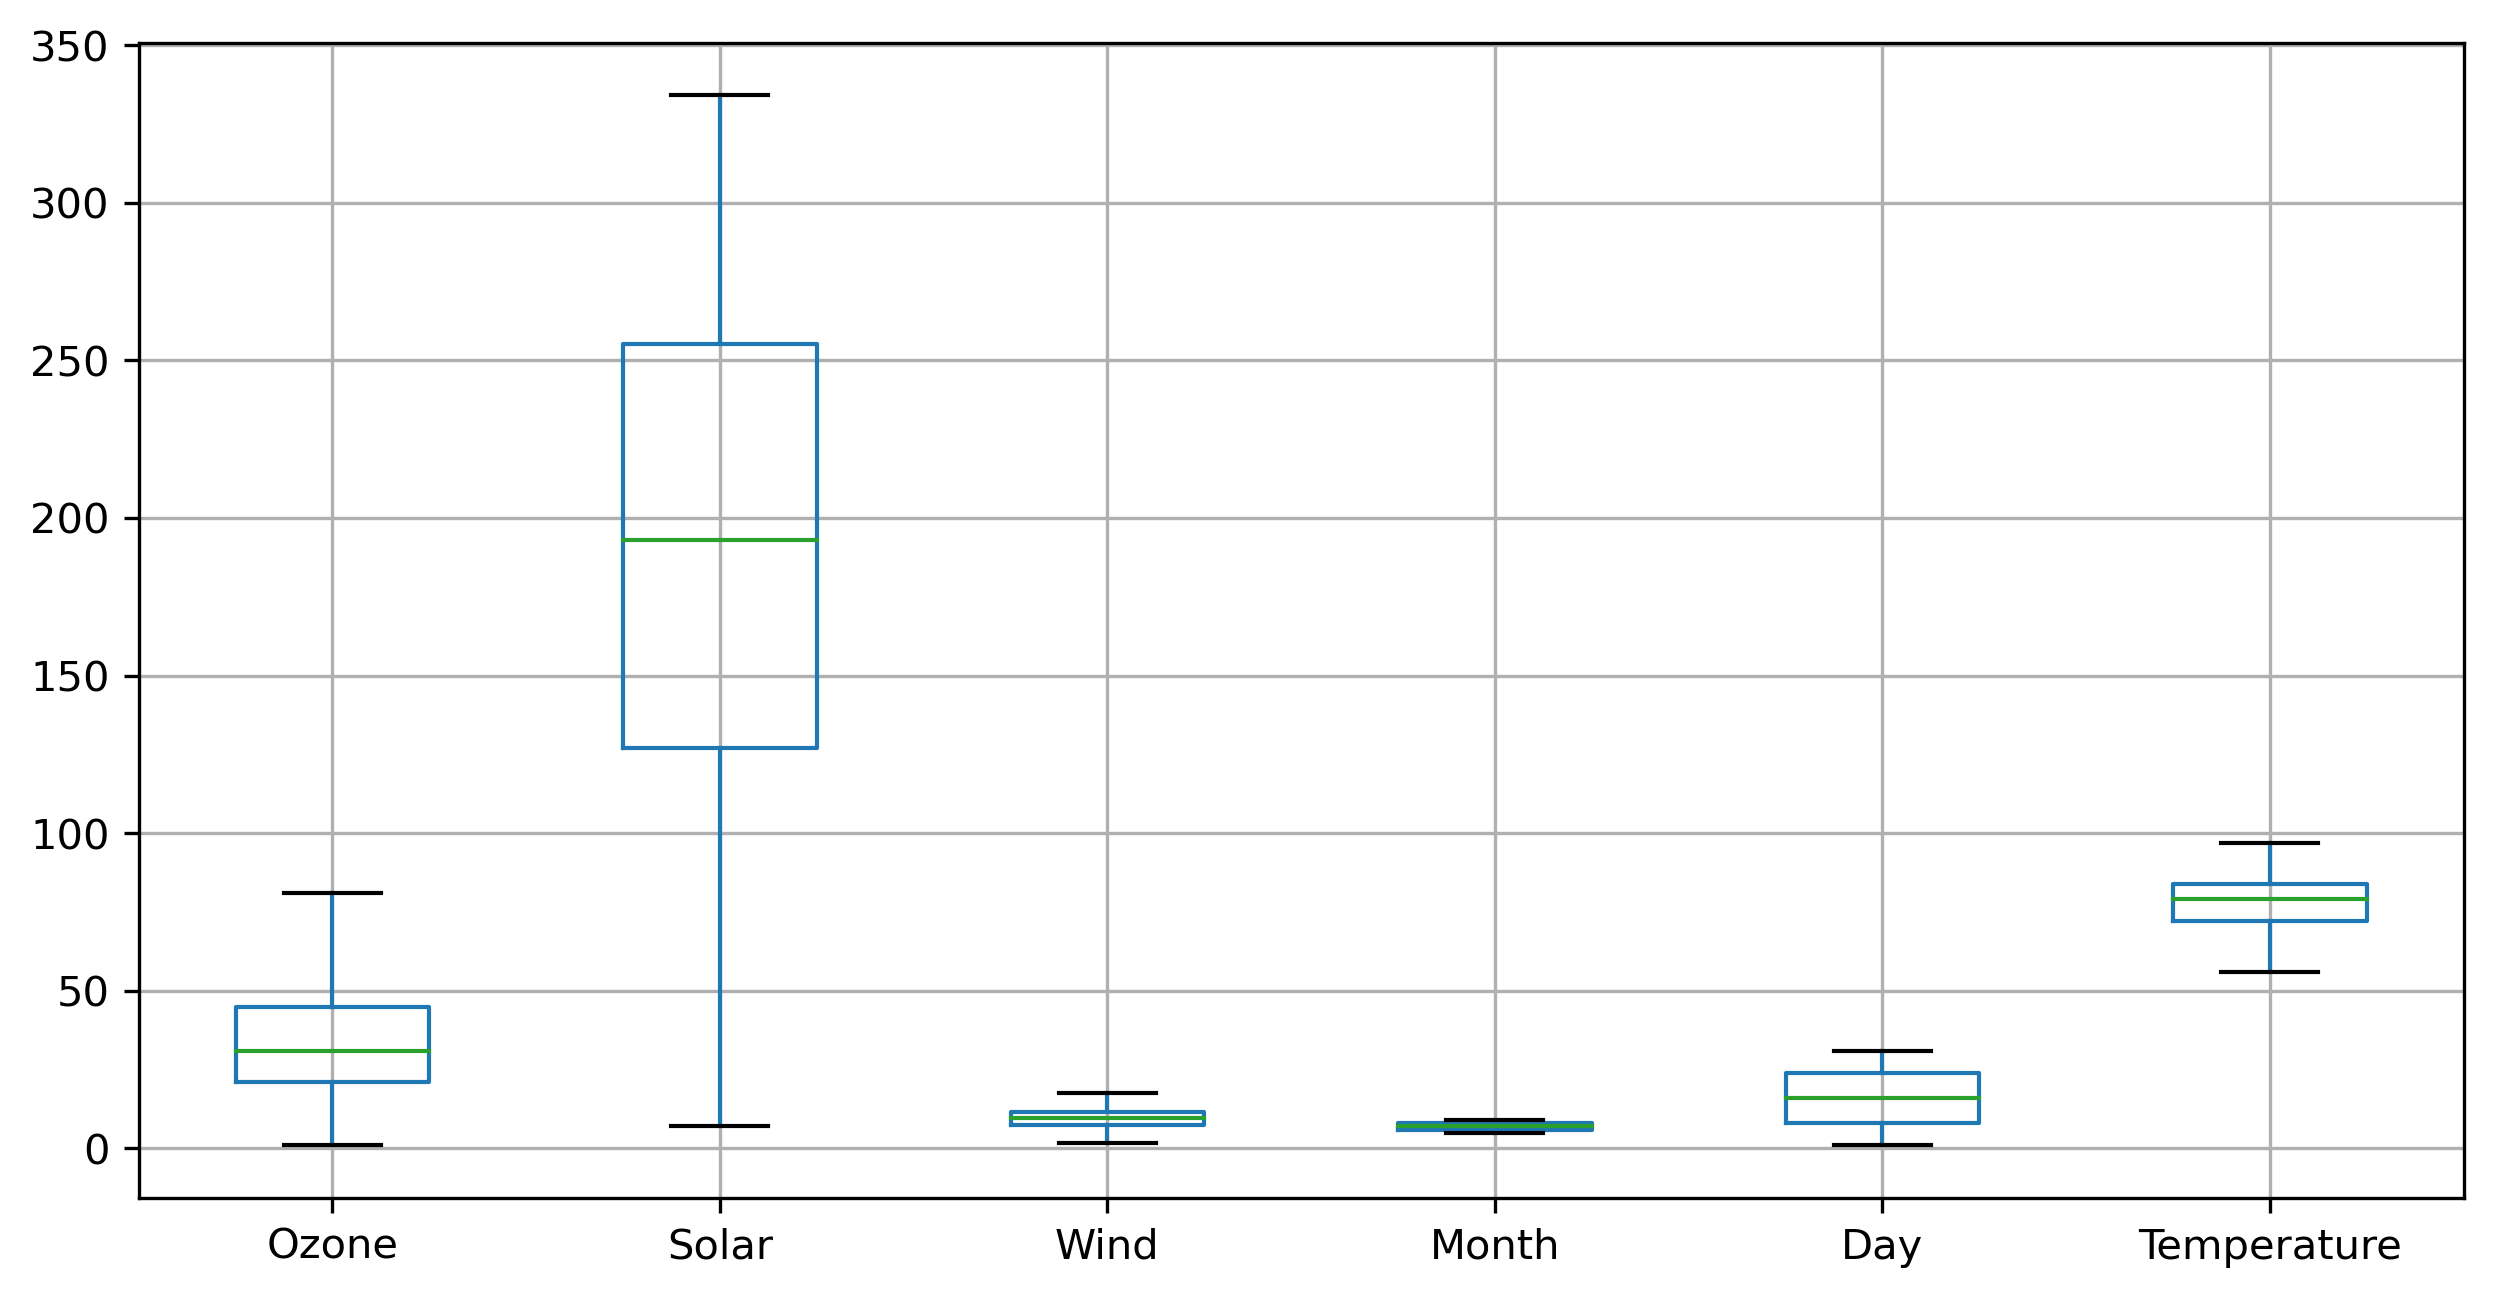

In [83]:
df.boxplot() # draw a boxplot again to confirm outliers are not present in any column

## Scatter Plot and Correlation 

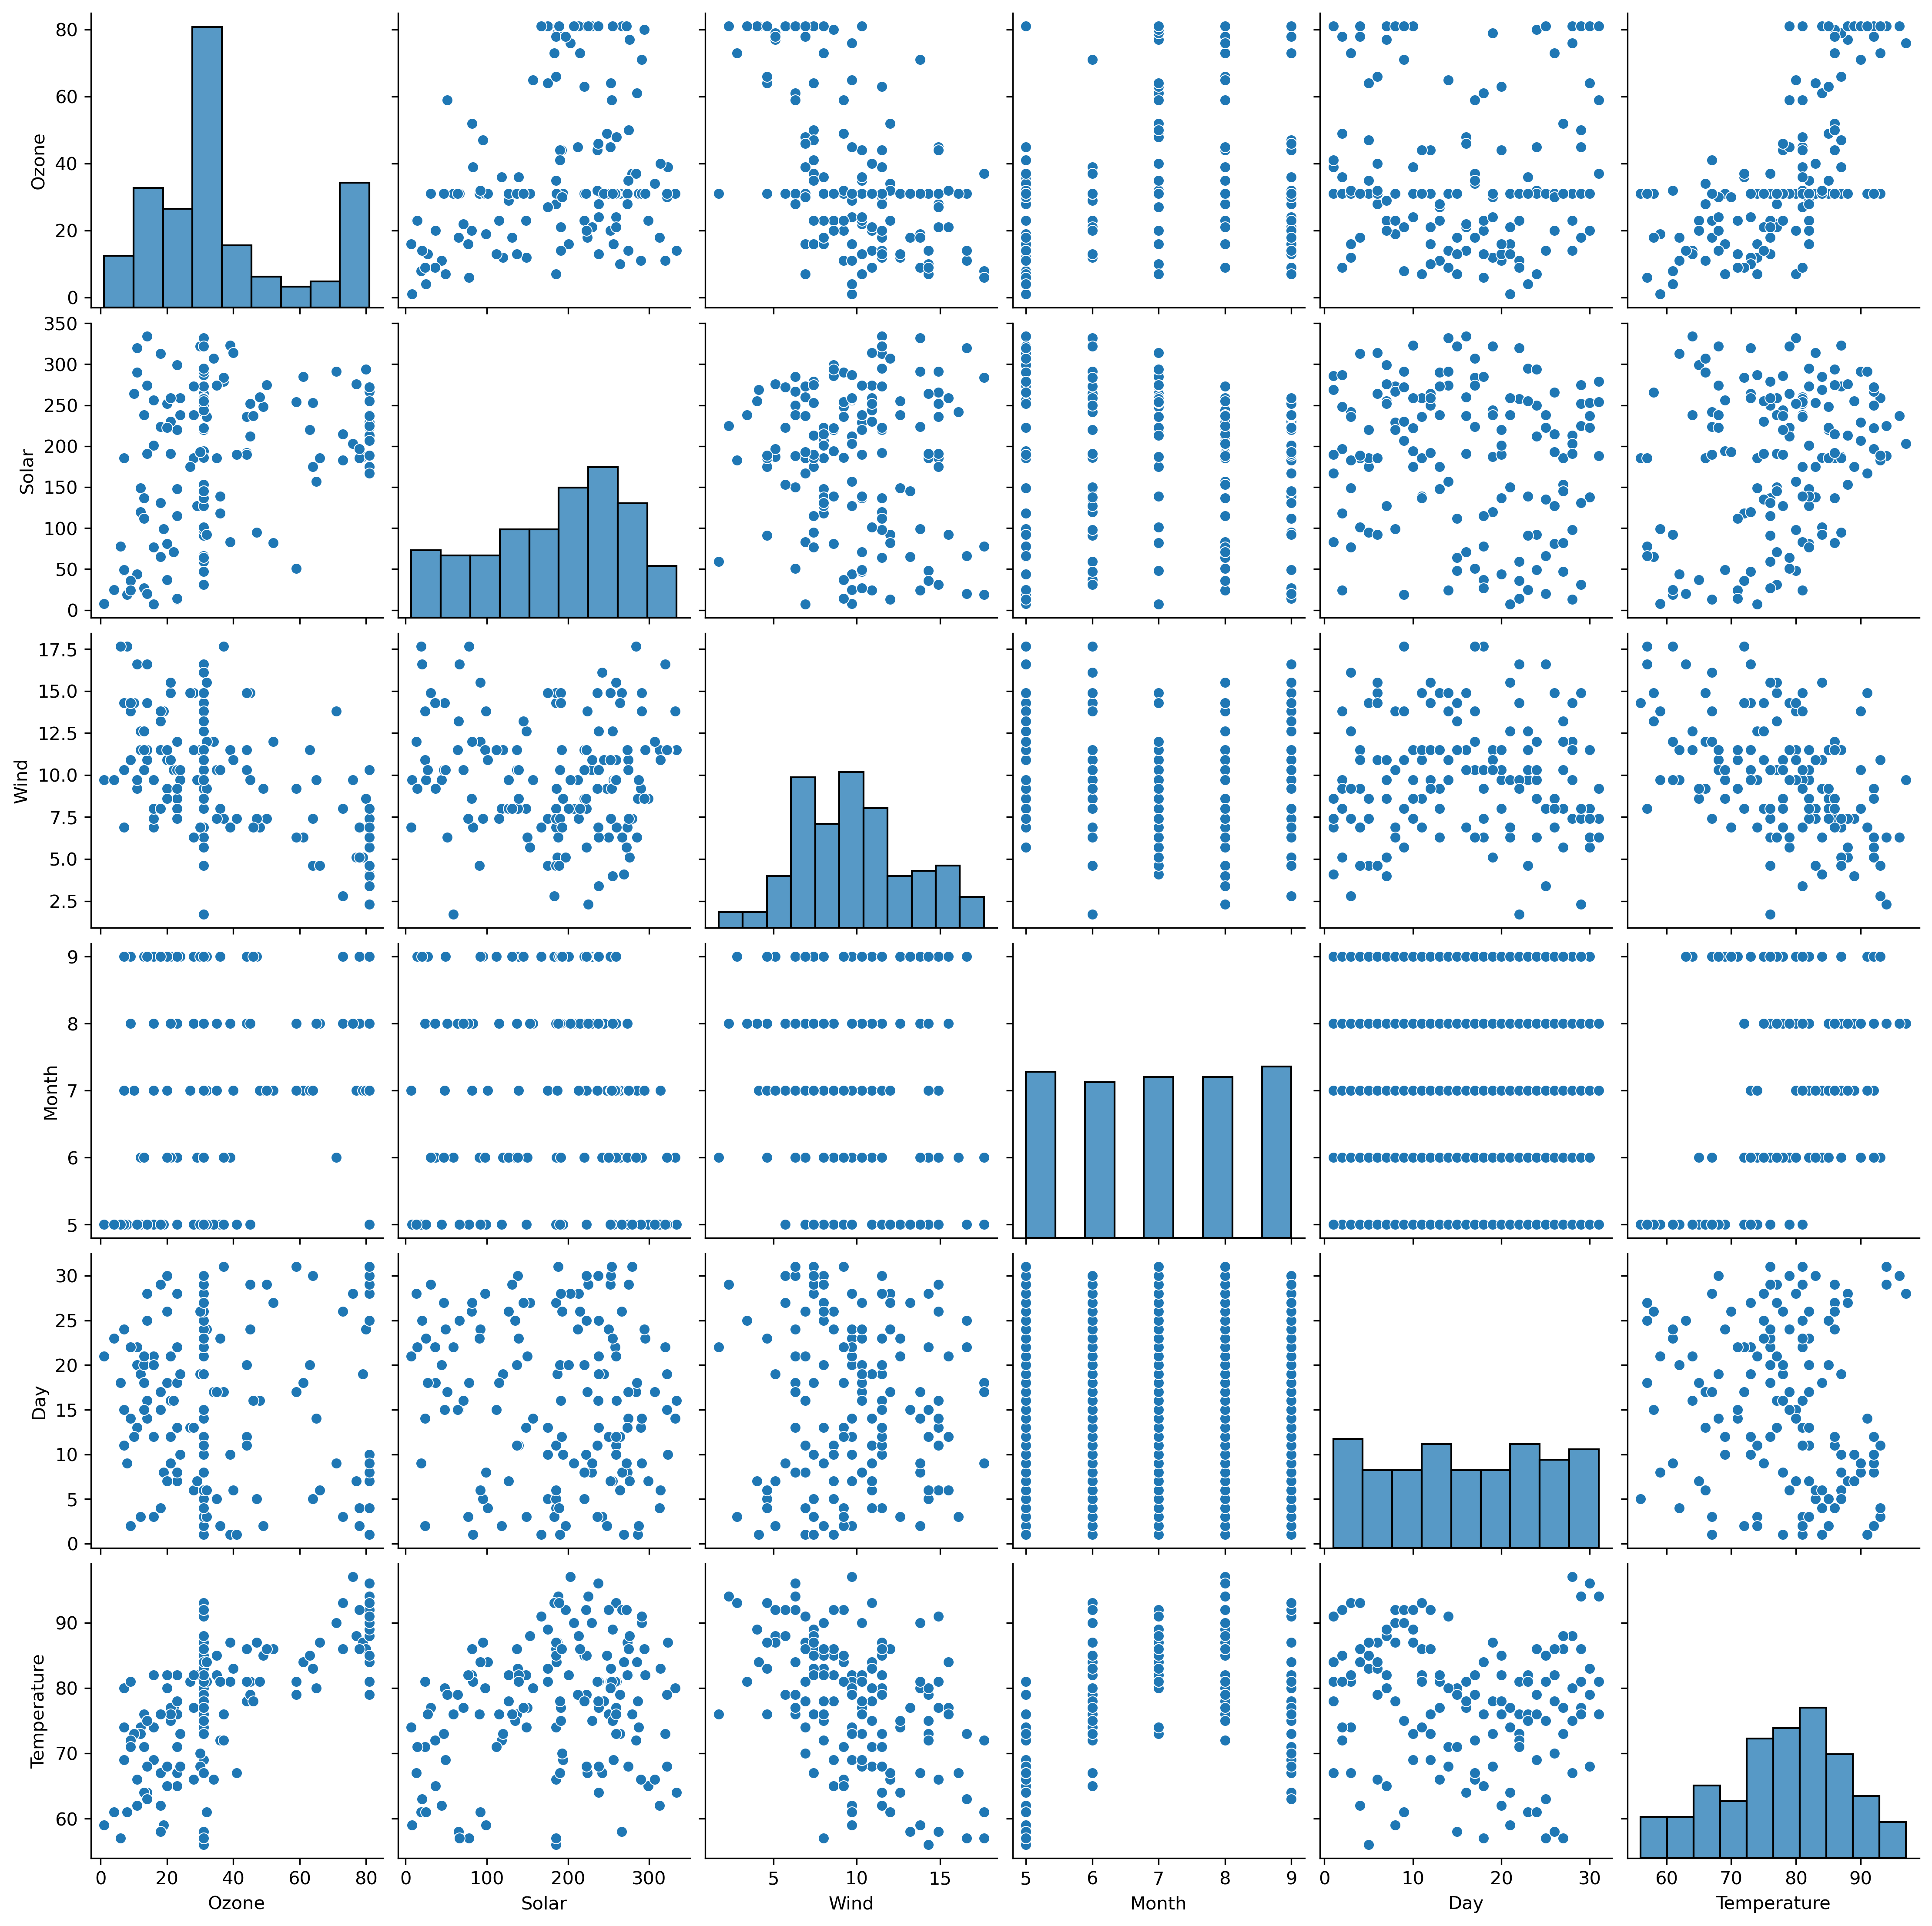

In [84]:
sns.pairplot(df)

In [85]:
df

Ozone       Solar  Wind  Month  Day  Temperature Weather
1     41.0  190.000000   7.4      5    1           67       S
2     36.0  118.000000   8.0      5    2           72       C
3     12.0  149.000000  12.6      5    3           74      PS
4     18.0  313.000000  11.5      5    4           62       S
5     31.0  185.366667  14.3      5    5           56       S
..     ...         ...   ...    ...  ...          ...     ...
153   20.0  223.000000  11.5      9   30           68       S
154   41.0  190.000000   7.4      5    1           67       C
155   30.0  193.000000   6.9      9   26           70      PS
156   31.0  145.000000  13.2      9   27           77       S
158   18.0  131.000000   8.0      9   29           76       C

[157 rows x 7 columns]

In [86]:
#Correlation coefficient
df.corr(numeric_only=True)

Ozone     Solar      Wind     Month       Day  Temperature
Ozone        1.000000  0.317926 -0.522513  0.183089 -0.042835     0.662773
Solar        0.317926  1.000000 -0.053534 -0.080237 -0.151007     0.260677
Wind        -0.522513 -0.053534  1.000000 -0.162988  0.033374    -0.439939
Month        0.183089 -0.080237 -0.162988  1.000000  0.041438     0.408060
Day         -0.042835 -0.151007  0.033374  0.041438  1.000000    -0.122787
Temperature  0.662773  0.260677 -0.439939  0.408060 -0.122787     1.000000

<Axes: >

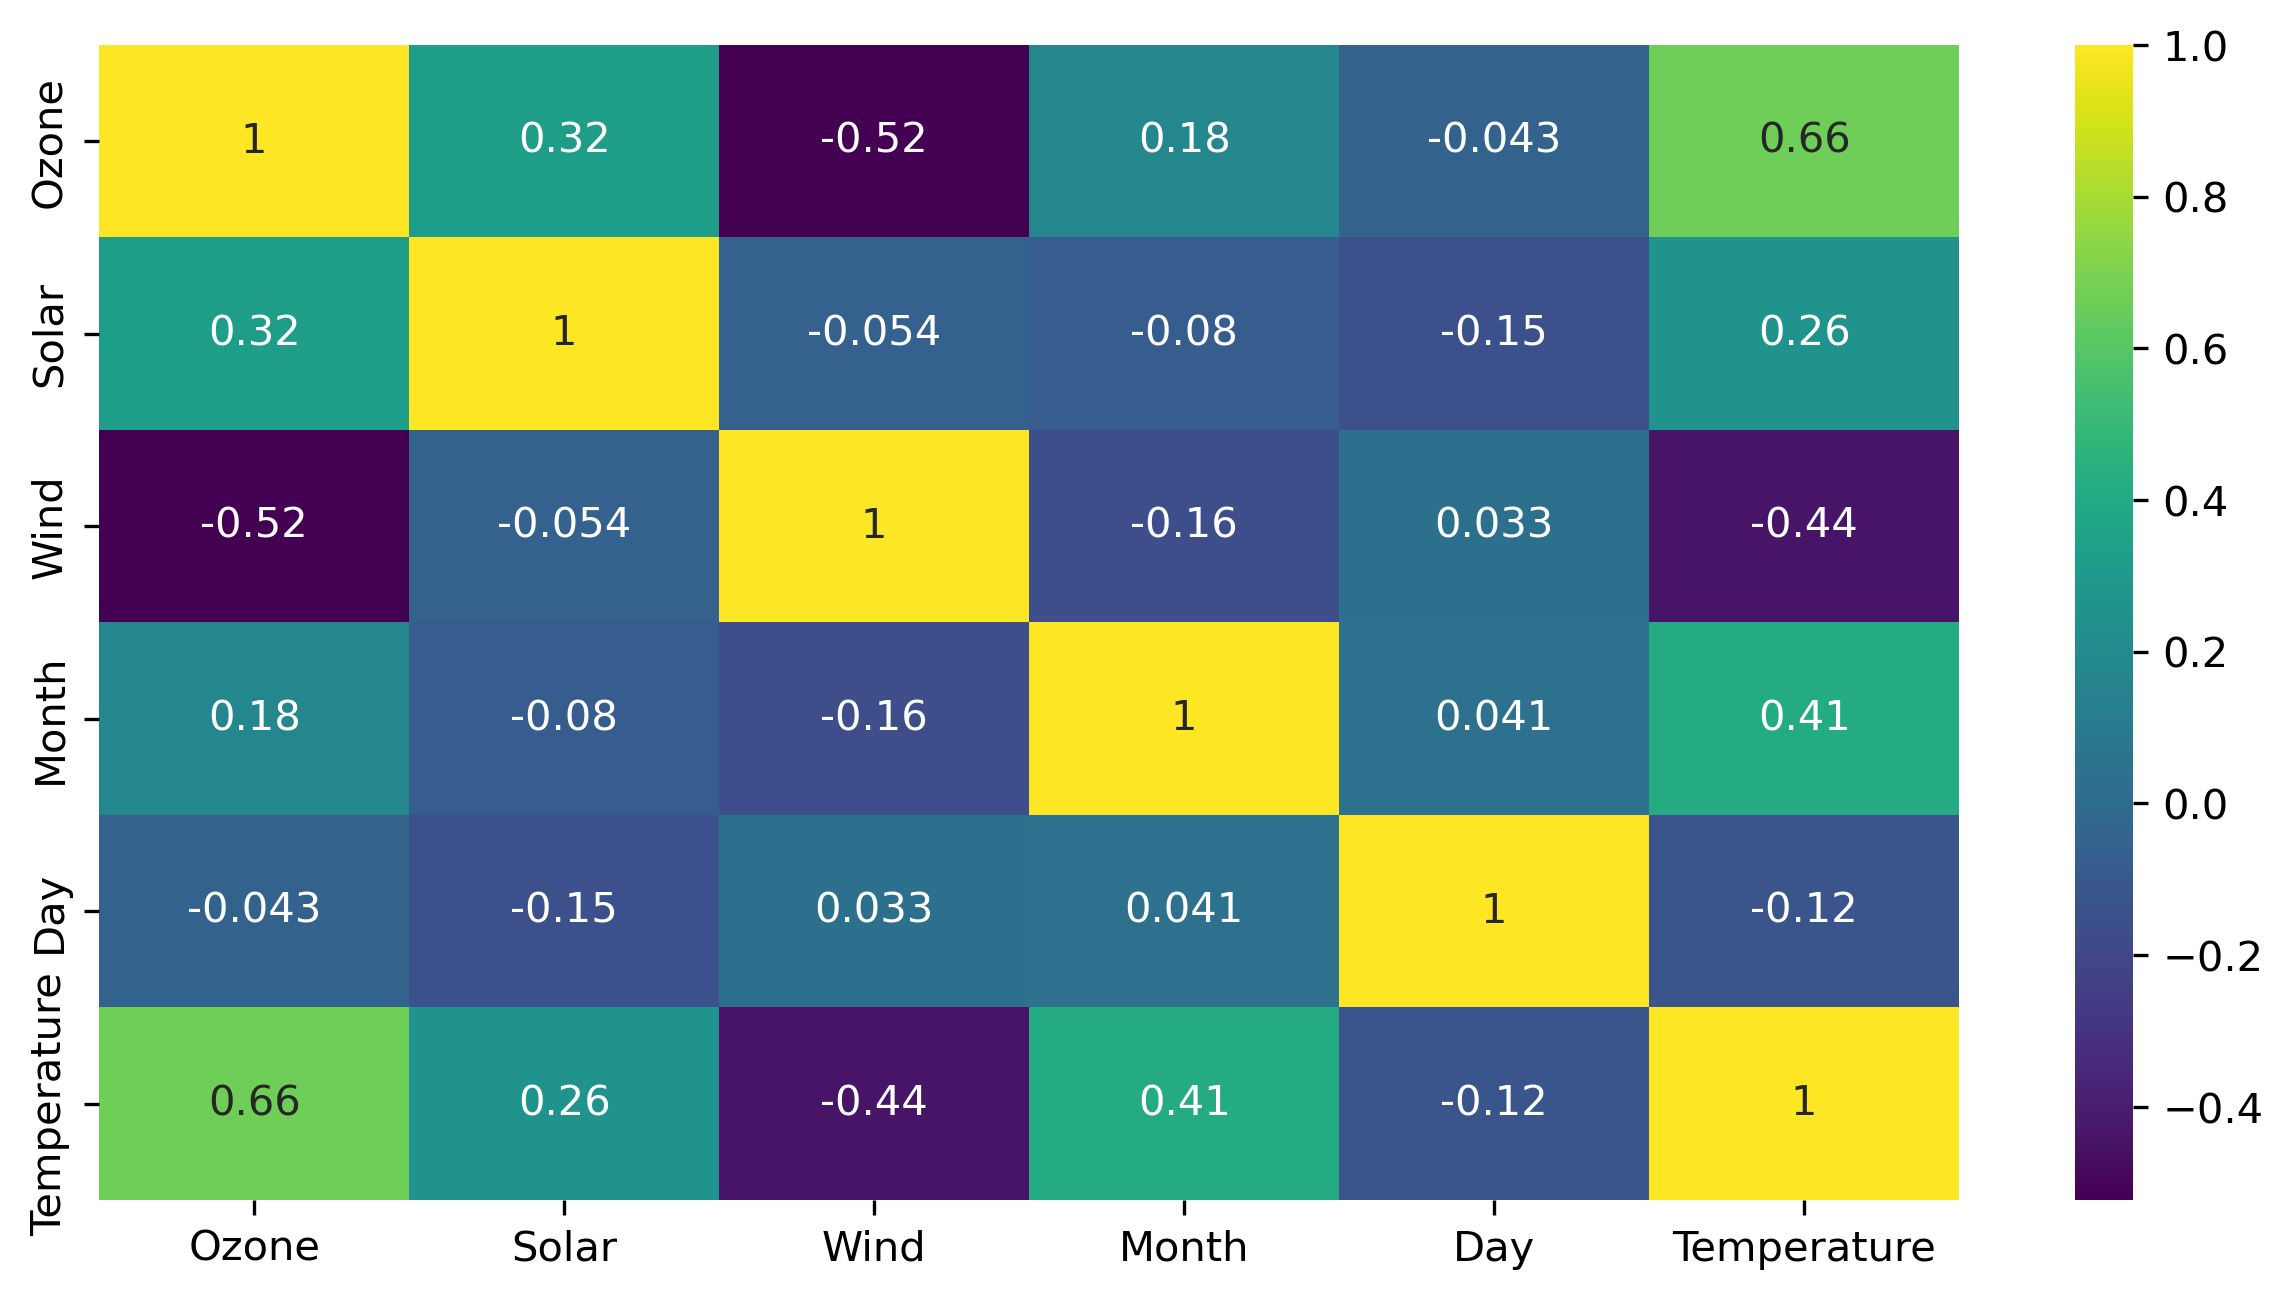

In [87]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis')

## Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.


In [88]:
#Encoding using pandas dummy function.
# one hot encoding

df = pd.get_dummies(data=df,columns= ['Weather'])

In [89]:
df 

Ozone       Solar  Wind  Month  Day  Temperature  Weather_C  Weather_PS  \
1     41.0  190.000000   7.4      5    1           67      False       False   
2     36.0  118.000000   8.0      5    2           72       True       False   
3     12.0  149.000000  12.6      5    3           74      False        True   
4     18.0  313.000000  11.5      5    4           62      False       False   
5     31.0  185.366667  14.3      5    5           56      False       False   
..     ...         ...   ...    ...  ...          ...        ...         ...   
153   20.0  223.000000  11.5      9   30           68      False       False   
154   41.0  190.000000   7.4      5    1           67       True       False   
155   30.0  193.000000   6.9      9   26           70      False        True   
156   31.0  145.000000  13.2      9   27           77      False       False   
158   18.0  131.000000   8.0      9   29           76       True       False   

     Weather_S  
1         True  
2        False  
3        False  
4         True  
5         True  
..         ...  
153       True  
154      False  
155      False  
156       True  
158      False  

[157 rows x 9 columns]

In [90]:
#In above ouput it gives answer in true or false. replace true by 1 and replace false by 0
df.replace(False, 0, inplace = True)
df.replace(True,1, inplace=True)

In [91]:
df

Ozone       Solar  Wind  Month  Day  Temperature  Weather_C  Weather_PS  \
1     41.0  190.000000   7.4      5    1           67          0           0   
2     36.0  118.000000   8.0      5    2           72          1           0   
3     12.0  149.000000  12.6      5    3           74          0           1   
4     18.0  313.000000  11.5      5    4           62          0           0   
5     31.0  185.366667  14.3      5    5           56          0           0   
..     ...         ...   ...    ...  ...          ...        ...         ...   
153   20.0  223.000000  11.5      9   30           68          0           0   
154   41.0  190.000000   7.4      5    1           67          1           0   
155   30.0  193.000000   6.9      9   26           70          0           1   
156   31.0  145.000000  13.2      9   27           77          0           0   
158   18.0  131.000000   8.0      9   29           76          1           0   

     Weather_S  
1            1  
2            0  
3            0  
4            1  
5            1  
..         ...  
153          1  
154          0  
155          0  
156          1  
158          0  

[157 rows x 9 columns]

## Scaling the data
- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [92]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [93]:
#Standardization
sc = StandardScaler()

In [94]:
df.head(2)

Ozone  Solar  Wind  Month  Day  Temperature  Weather_C  Weather_PS  \
1   41.0  190.0   7.4      5    1           67          0           0   
2   36.0  118.0   8.0      5    2           72          1           0   

   Weather_S  
1          1  
2          0

In [95]:
df.describe()

Ozone       Solar        Wind       Month         Day  \
count  157.000000  157.000000  157.000000  157.000000  157.000000   
mean    36.738854  185.366667    9.890127    7.019108   15.929936   
std     22.475955   86.998999    3.400652    1.434338    8.974404   
min      1.000000    7.000000    1.700000    5.000000    1.000000   
25%     21.000000  127.000000    7.400000    6.000000    8.000000   
50%     31.000000  193.000000    9.700000    7.000000   16.000000   
75%     45.000000  255.000000   11.500000    8.000000   24.000000   
max     81.000000  334.000000   17.650000    9.000000   31.000000   

       Temperature   Weather_C  Weather_PS   Weather_S  
count   157.000000  157.000000  157.000000  157.000000  
mean     77.745223    0.312102    0.299363    0.388535  
std       9.405334    0.464834    0.459445    0.488977  
min      56.000000    0.000000    0.000000    0.000000  
25%      72.000000    0.000000    0.000000    0.000000  
50%      79.000000    0.000000    0.000000    0.000000  
75%      84.000000    1.000000    1.000000    1.000000  
max      97.000000    1.000000    1.000000    1.000000

In [96]:
# fit function do all the calculation and trasform function replace previous value with calculated value using z score
sc.fit_transform(df)

array([[ 0.19019358,  0.05342774, -0.73459309, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.03297826, -0.7768163 , -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-1.10420306, -0.41935011,  0.79941842, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.30078446,  0.08802124, -0.8820942 , ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.25615009, -0.46547478,  0.97641975, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.83639686, -0.62691113, -0.55759177, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [97]:
df.columns

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Temperature', 'Weather_C',
       'Weather_PS', 'Weather_S'],
      dtype='object')

In [98]:
scaled_data = pd.DataFrame(sc.fit_transform(df), columns=df.columns) # without mentioning columns ouput shows column index no.
scaled_data

Ozone     Solar      Wind     Month       Day  Temperature  Weather_C  \
0    0.190194  0.053428 -0.734593 -1.412198 -1.668937    -1.146116  -0.673575   
1   -0.032978 -0.776816 -0.557592 -1.412198 -1.557152    -0.612802   1.484615   
2   -1.104203 -0.419350  0.799418 -1.412198 -1.445367    -0.399476  -0.673575   
3   -0.836397  1.471761  0.474916 -1.412198 -1.333583    -1.679431  -0.673575   
4   -0.256150  0.000000  1.300922 -1.412198 -1.221798    -2.319408  -0.673575   
..        ...       ...       ...       ...       ...          ...        ...   
152 -0.747128  0.433956  0.474916  1.385469  1.572816    -1.039454  -0.673575   
153  0.190194  0.053428 -0.734593 -1.412198 -1.668937    -1.146116   1.484615   
154 -0.300784  0.088021 -0.882094  1.385469  1.125678    -0.826128  -0.673575   
155 -0.256150 -0.465475  0.976420  1.385469  1.237462    -0.079488  -0.673575   
156 -0.836397 -0.626911 -0.557592  1.385469  1.461032    -0.186150   1.484615   

     Weather_PS  Weather_S  
0     -0.653661    1.25450  
1     -0.653661   -0.79713  
2      1.529845   -0.79713  
3     -0.653661    1.25450  
4     -0.653661    1.25450  
..          ...        ...  
152   -0.653661    1.25450  
153   -0.653661   -0.79713  
154    1.529845   -0.79713  
155   -0.653661    1.25450  
156   -0.653661   -0.79713  

[157 rows x 9 columns]

In [99]:
scaled_data.describe()

Ozone         Solar          Wind         Month           Day  \
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02   
mean  -3.394312e-17 -9.051500e-17  1.470869e-16  1.810300e-16 -2.262875e-17   
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00   
min   -1.595181e+00 -2.056776e+00 -2.416106e+00 -1.412198e+00 -1.668937e+00   
25%   -7.024938e-01 -6.730358e-01 -7.345931e-01 -7.127815e-01 -8.864446e-01   
50%   -2.561501e-01  8.802124e-02 -5.608800e-02 -1.336465e-02  7.832041e-03   
75%    3.687310e-01  8.029536e-01  4.749160e-01  6.860522e-01  9.021087e-01   
max    1.975568e+00  1.713916e+00  2.289180e+00  1.385469e+00  1.684601e+00   

        Temperature     Weather_C    Weather_PS     Weather_S  
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  
mean   2.036587e-16  4.242891e-17 -8.485781e-18 -7.849347e-17  
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  
min   -2.319408e+00 -6.735753e-01 -6.536610e-01 -7.971303e-01  
25%   -6.128020e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
50%    1.338381e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
75%    6.671525e-01  1.484615e+00  1.529845e+00  1.254500e+00  
max    2.053770e+00  1.484615e+00  1.529845e+00  1.254500e+00

In [100]:
# to save file in csv
scaled_data.to_csv('Scaled_data.csv')

In [101]:
#MinMaxScalar = Normalization 
mn = MinMaxScaler()

In [102]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled

Ozone     Solar      Wind  Month       Day  Temperature  Weather_C  \
0    0.5000  0.559633  0.357367    0.0  0.000000     0.268293        0.0   
1    0.4375  0.339450  0.394984    0.0  0.033333     0.390244        1.0   
2    0.1375  0.434251  0.683386    0.0  0.066667     0.439024        0.0   
3    0.2125  0.935780  0.614420    0.0  0.100000     0.146341        0.0   
4    0.3750  0.545464  0.789969    0.0  0.133333     0.000000        0.0   
..      ...       ...       ...    ...       ...          ...        ...   
152  0.2375  0.660550  0.614420    1.0  0.966667     0.292683        0.0   
153  0.5000  0.559633  0.357367    0.0  0.000000     0.268293        1.0   
154  0.3625  0.568807  0.326019    1.0  0.833333     0.341463        0.0   
155  0.3750  0.422018  0.721003    1.0  0.866667     0.512195        0.0   
156  0.2125  0.379205  0.394984    1.0  0.933333     0.487805        1.0   

     Weather_PS  Weather_S  
0           0.0        1.0  
1           0.0        0.0  
2           1.0        0.0  
3           0.0        1.0  
4           0.0        1.0  
..          ...        ...  
152         0.0        1.0  
153         0.0        0.0  
154         1.0        0.0  
155         0.0        1.0  
156         0.0        0.0  

[157 rows x 9 columns]

In [103]:
minmax_scaled.describe()

Ozone       Solar        Wind       Month         Day  \
count  157.000000  157.000000  157.000000  157.000000  157.000000   
mean     0.446736    0.545464    0.513488    0.504777    0.497665   
std      0.280949    0.266052    0.213207    0.358584    0.299147   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    0.366972    0.357367    0.250000    0.233333   
50%      0.375000    0.568807    0.501567    0.500000    0.500000   
75%      0.550000    0.758410    0.614420    0.750000    0.766667   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Temperature   Weather_C  Weather_PS   Weather_S  
count   157.000000  157.000000  157.000000  157.000000  
mean      0.530371    0.312102    0.299363    0.388535  
std       0.229398    0.464834    0.459445    0.488977  
min       0.000000    0.000000    0.000000    0.000000  
25%       0.390244    0.000000    0.000000    0.000000  
50%       0.560976    0.000000    0.000000    0.000000  
75%       0.682927    1.000000    1.000000    1.000000  
max       1.000000    1.000000    1.000000    1.000000

## Speed up the EDA process 

In [104]:
# import libraries

In [105]:
!pip install ydata-profiling
!pip install sweetviz

In [106]:
#from ydata_profiling import ProfileReport
import pandas_profiling as pp
import sweetviz as sv

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/EDA-1/data_clean.csv', index_col=0)
df.head()

Ozone  Solar.R  Wind Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     5    1  2010    67       S
2   36.0    118.0   8.0     5    2  2010    72       C
3   12.0    149.0  12.6     5    3  2010    74      PS
4   18.0    313.0  11.5     5    4  2010    62       S
5    NaN      NaN  14.3     5    5  2010    56       S

- For a dataset with less elements than a given number (say 5), pandas-profiling assumes that your variable is categorical instead of numerical.

In [108]:
EDA_report = pp.ProfileReport(df,vars=dict(num={"low_categorical_threshold": 0}))
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
report = sv.analyze(df)

                                             |     | [  0%]   00:00 -> (? left)

In [110]:
# sweetviz library show output in html format
report.show_html('sweetviz.html')

Report sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
